In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
np.random.seed(1)
tf.random.set_seed(2)
# basic paths
train_dir = "./dataset/train"
test_dir = "./dataset/test"
val_dir = "./dataset/validation"

class_names = os.listdir(train_dir)

def get_dir_filenames(base_dir, name):
    dir = os.path.join(base_dir, name)

    return {"dir": dir, "file_names": os.listdir(dir)}


train = {name: get_dir_filenames(train_dir, name) for name in class_names}
val = {name: get_dir_filenames(val_dir, name) for name in class_names}

In [3]:
train_len = sum(map(lambda x: len(x['file_names']), train.values()))
val_len = sum(map(lambda x: len(x['file_names']), val.values()))

print(f"Total training images: {train_len}")
print(f"Total validation images: {val_len}")

Total training images: 42
Total validation images: 8


In [4]:
# img_input = layers.Input(shape=(150, 150, 10))

# x = layers.Conv2D(16, 3, activation='relu')(img_input)
# x = layers.MaxPooling2D(2)(x)

# x = layers.Conv2D(32, 3, activation='relu')(x)
# x = layers.MaxPooling2D(2)(x)

# x = layers.Conv2D(64, 3, activation='relu')(x)
# x = layers.MaxPooling2D(2)(x)

# x = layers.Conv2D(64, 3, activation='relu')(x)
# x = layers.MaxPooling2D(2)(x)

base_model = tf.keras.applications.ResNet152(weights='imagenet', include_top=False, input_shape=(150,150,3))

for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(3, activation='softmax')(x)

model = Model(base_model.input, output)

model.summary()

# model.compile(loss='categorical_crossentropy',
#             optimizer=RMSprop(learning_rate=0.001),
#             metrics=['acc'])

model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['acc'])

2022-04-07 15:06:41.454958: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-07 15:06:41.455023: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arch): /proc/driver/nvidia/version does not exist
2022-04-07 15:06:41.457906: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# All images will be rescaled by 1./255
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
# )
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=6,
        class_mode='categorical',
        subset='training')


validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=2,
        class_mode='categorical')

Found 42 images belonging to 3 classes.
Found 8 images belonging to 3 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=6,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=2,
      verbose=2)

Epoch 1/40
6/6 - 33s - loss: 27.7458 - acc: 0.3611 - val_loss: 21.8558 - val_acc: 0.5000 - 33s/epoch - 5s/step
Epoch 2/40
6/6 - 13s - loss: 9.5429 - acc: 0.3889 - val_loss: 7.7595 - val_acc: 0.2500 - 13s/epoch - 2s/step
Epoch 3/40
6/6 - 14s - loss: 5.1685 - acc: 0.3056 - val_loss: 1.7414 - val_acc: 0.5000 - 14s/epoch - 2s/step
Epoch 4/40
6/6 - 14s - loss: 3.7024 - acc: 0.3611 - val_loss: 5.4760 - val_acc: 0.0000e+00 - 14s/epoch - 2s/step
Epoch 5/40
6/6 - 13s - loss: 2.1326 - acc: 0.4722 - val_loss: 1.8584 - val_acc: 0.2500 - 13s/epoch - 2s/step
Epoch 6/40
6/6 - 14s - loss: 0.9665 - acc: 0.7222 - val_loss: 1.6153 - val_acc: 0.5000 - 14s/epoch - 2s/step
Epoch 7/40
6/6 - 14s - loss: 2.5326 - acc: 0.3611 - val_loss: 6.9931 - val_acc: 0.5000 - 14s/epoch - 2s/step
Epoch 8/40
6/6 - 14s - loss: 1.4981 - acc: 0.7222 - val_loss: 1.1241 - val_acc: 0.5000 - 14s/epoch - 2s/step
Epoch 9/40
6/6 - 14s - loss: 1.8602 - acc: 0.5833 - val_loss: 0.5630 - val_acc: 0.5000 - 14s/epoch - 2s/step
Epoch 10/40
6

/tmp/ipykernel_14893/2391933438.py:28: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()
/tmp/ipykernel_14893/2391933438.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(scale * n_features, scale))


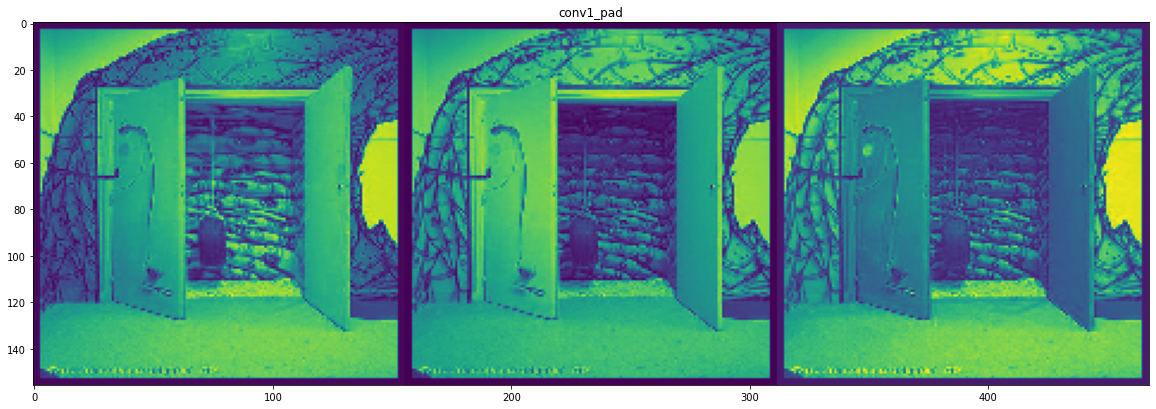

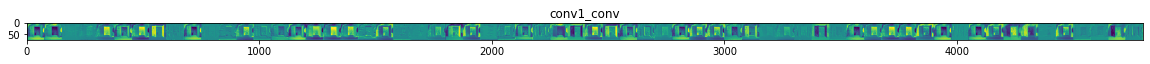

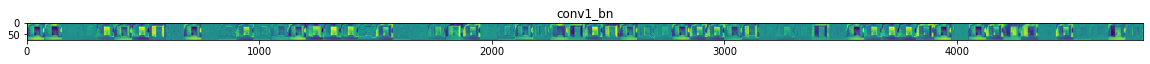

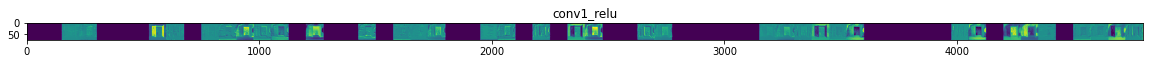

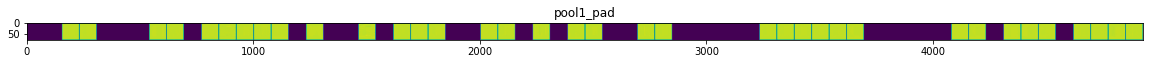

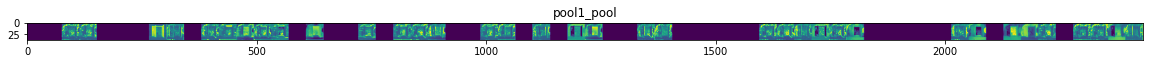

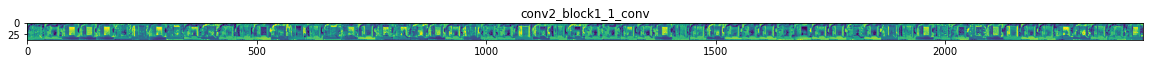

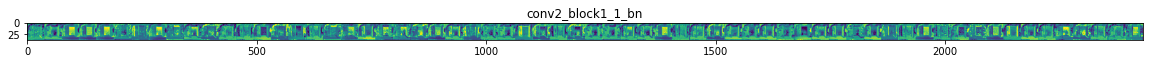

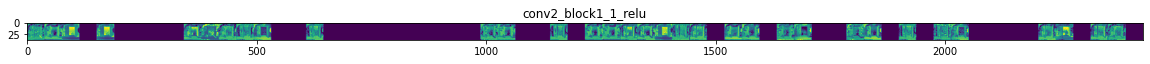

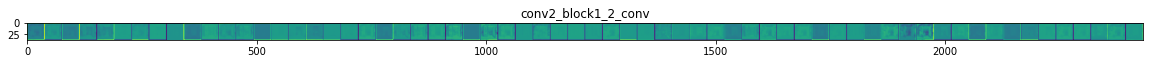

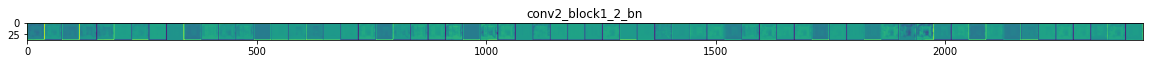

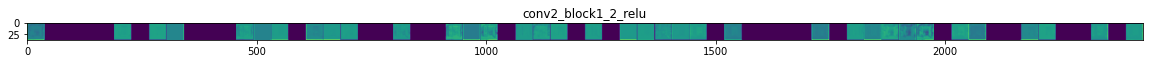

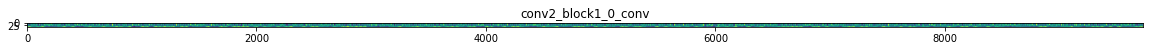

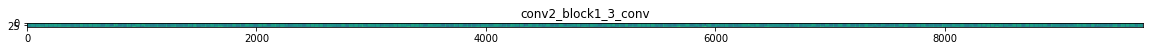

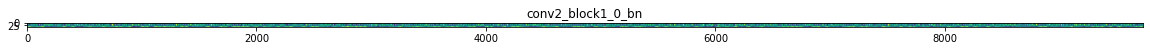

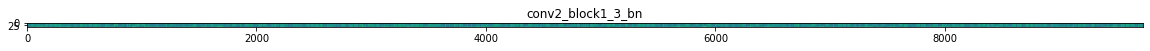

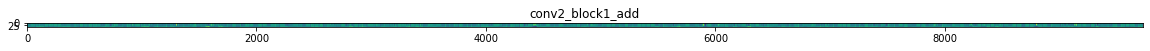

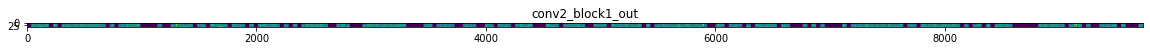

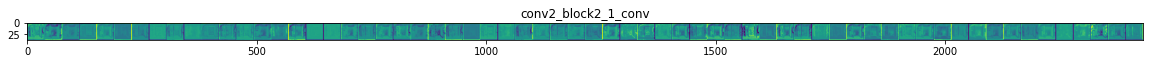

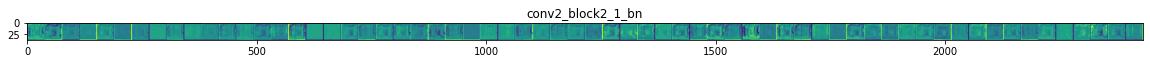

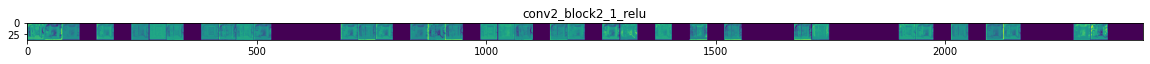

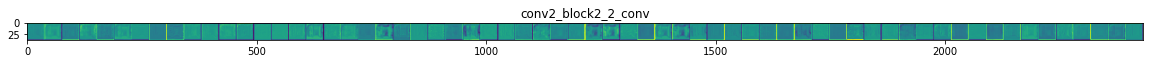

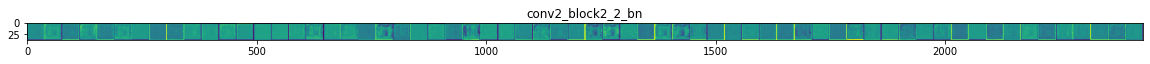

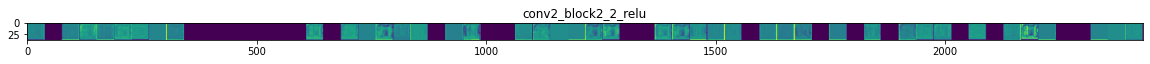

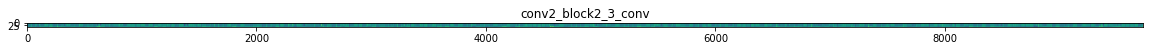

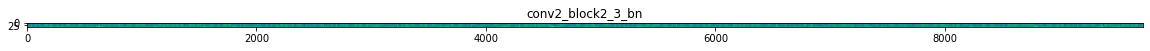

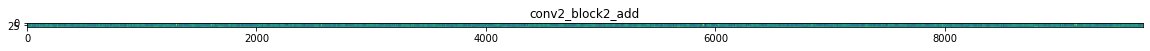

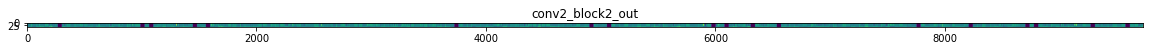

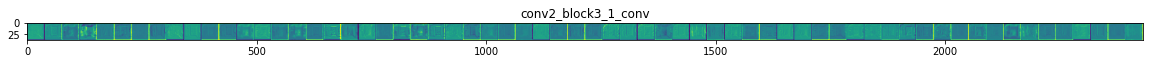

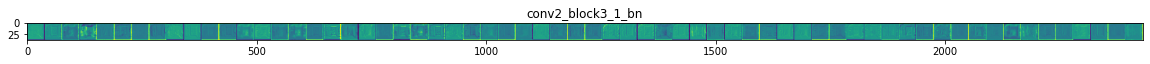

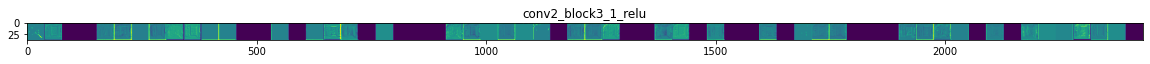

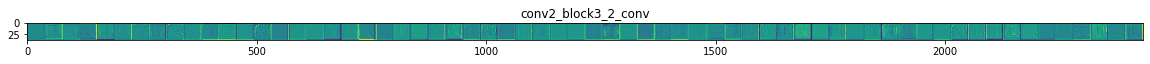

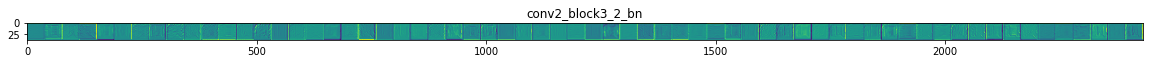

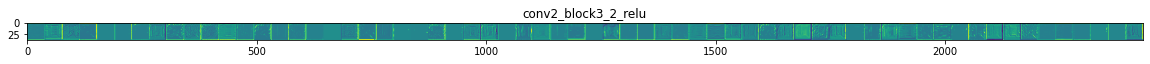

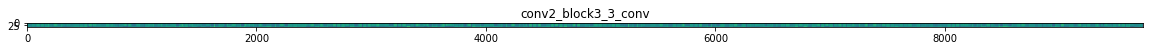

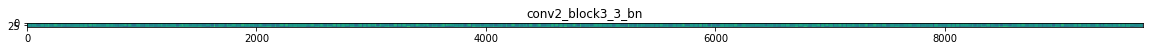

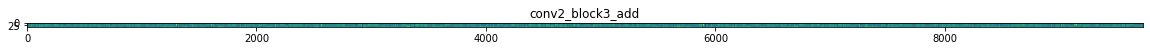

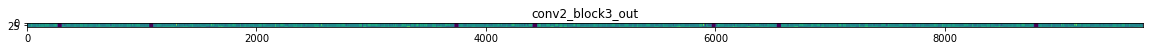

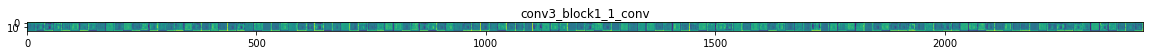

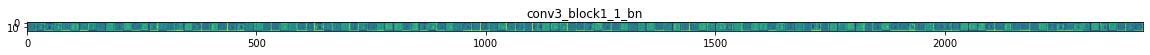

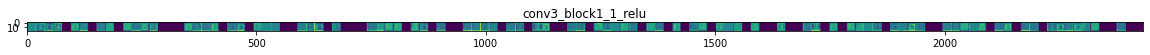

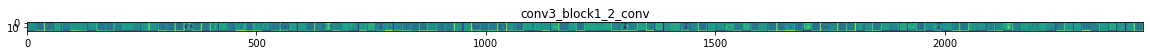

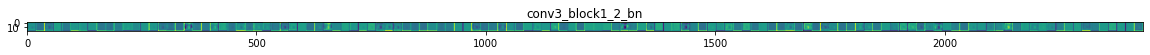

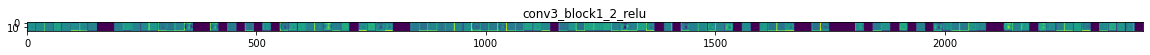

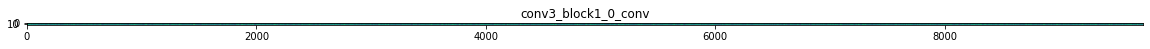

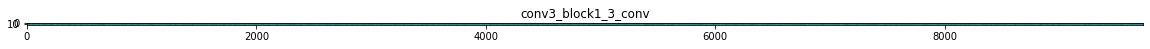

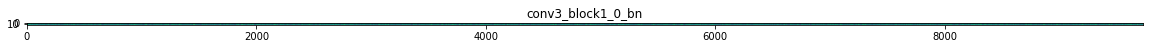

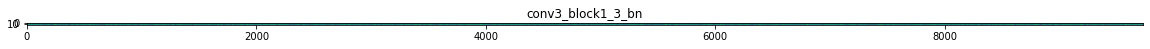

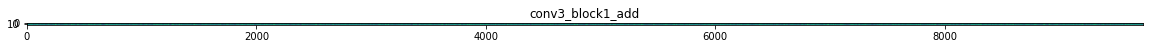

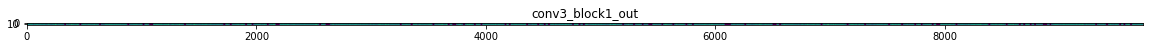

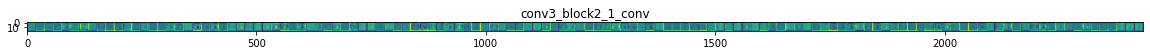

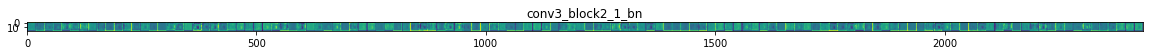

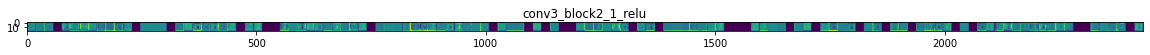

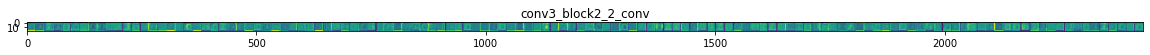

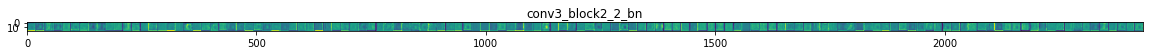

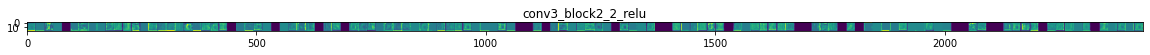

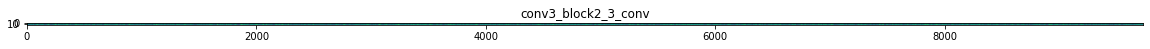

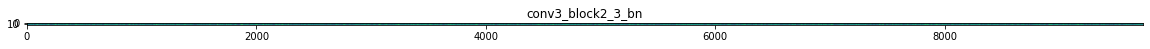

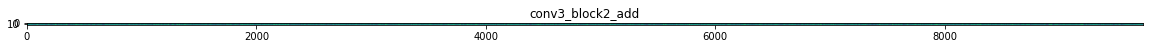

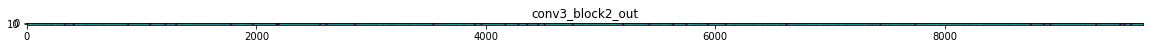

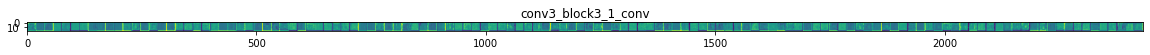

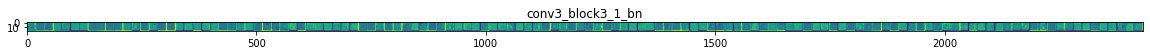

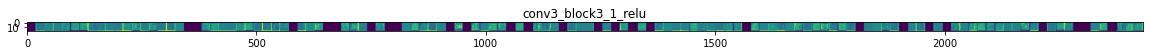

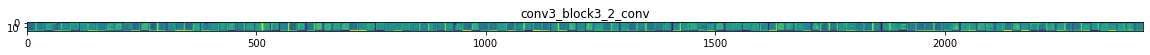

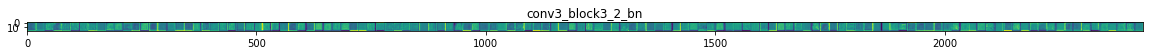

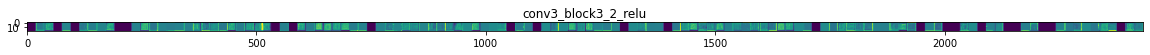

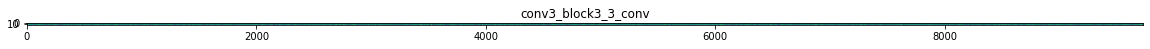

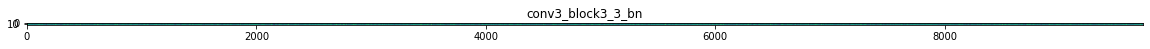

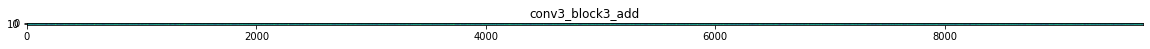

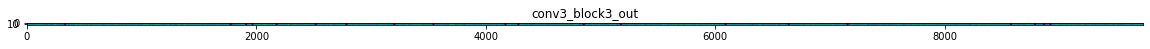

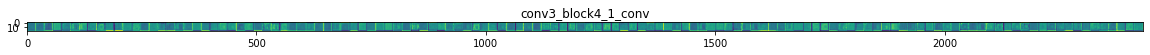

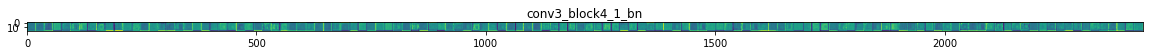

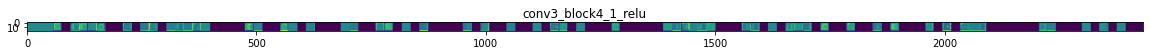

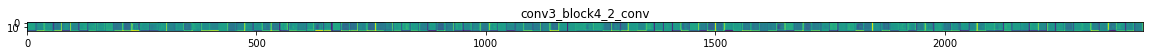

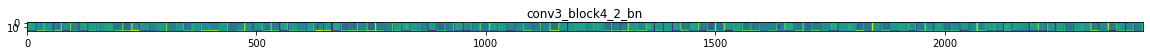

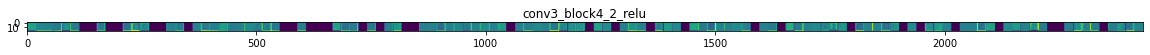

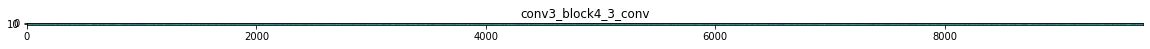

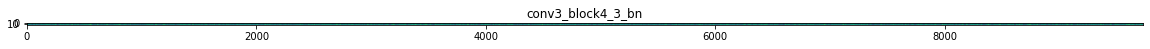

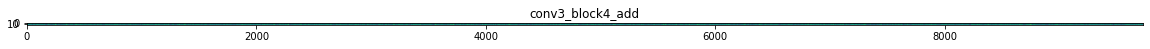

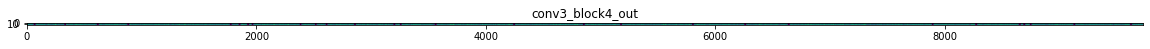

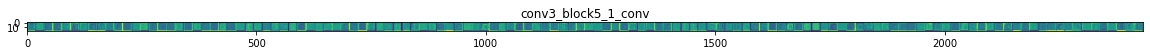

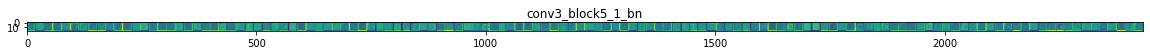

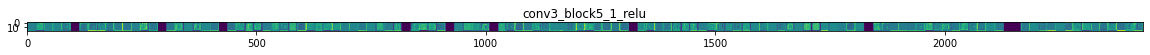

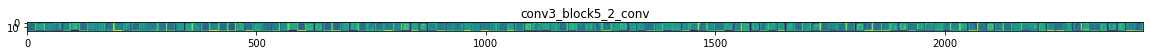

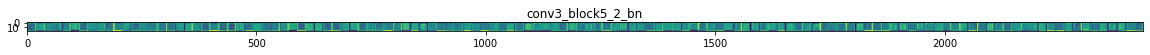

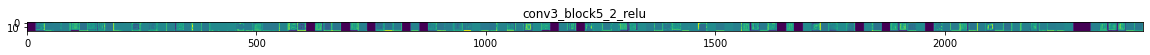

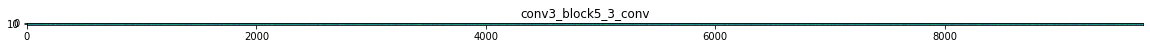

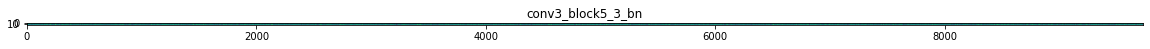

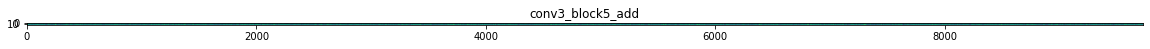

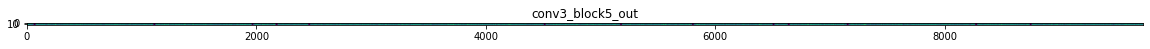

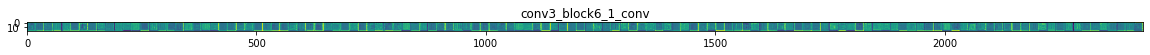

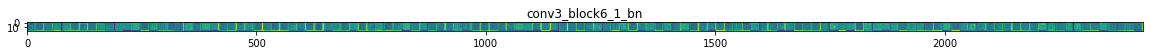

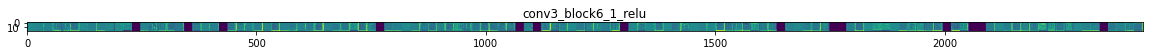

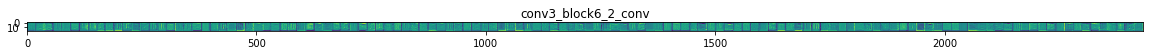

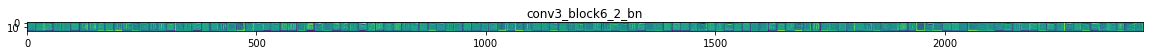

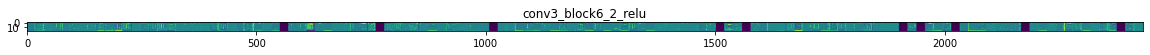

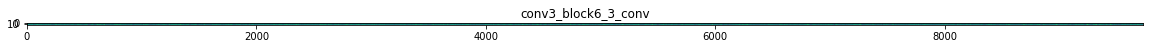

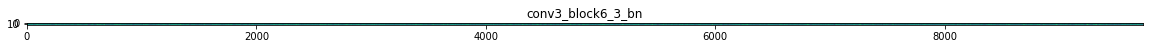

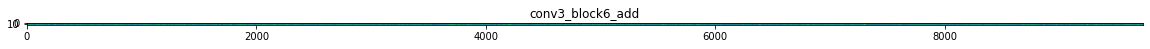

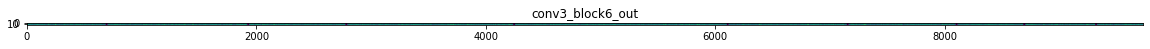

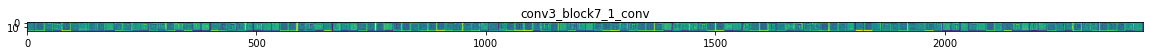

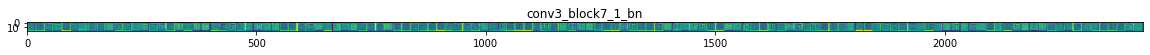

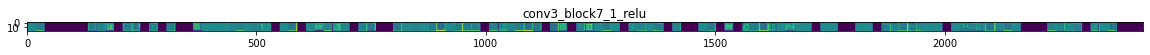

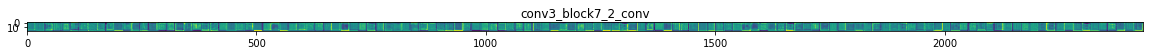

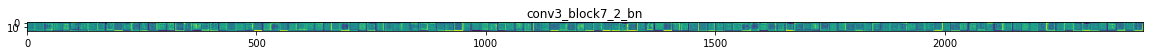

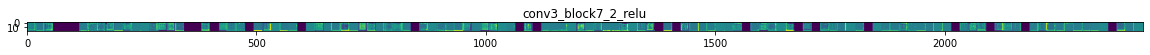

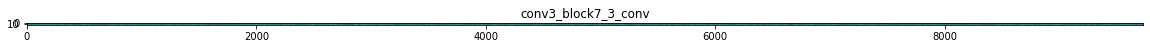

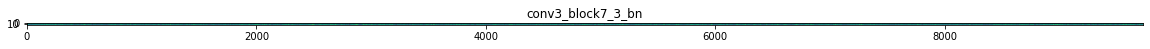

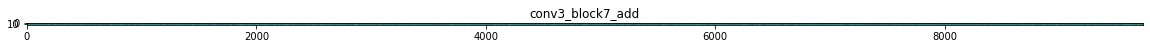

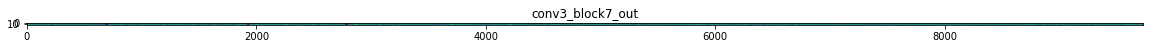

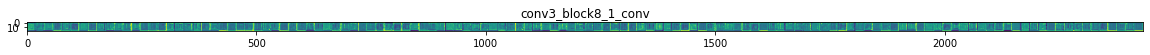

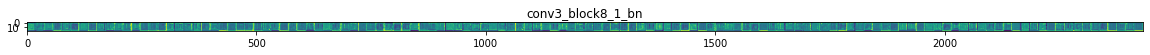

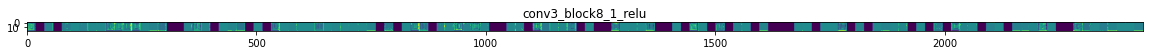

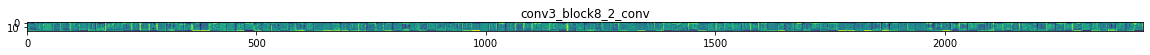

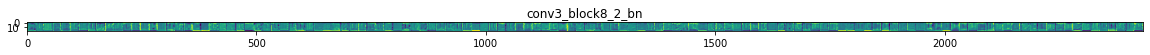

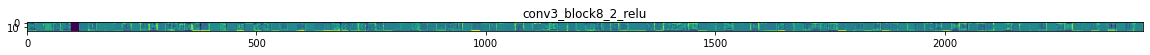

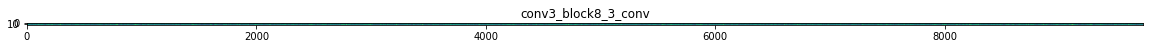

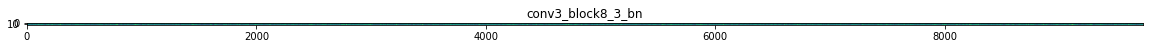

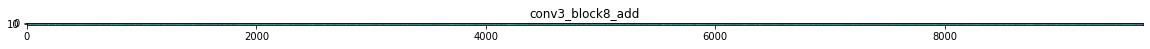

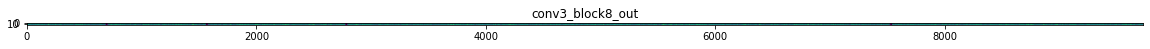

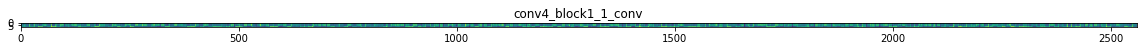

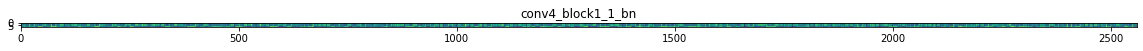

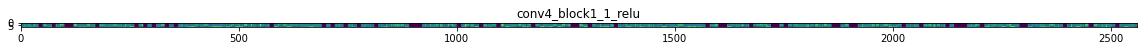

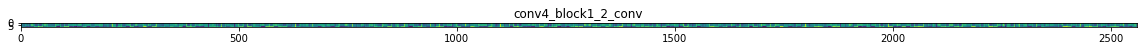

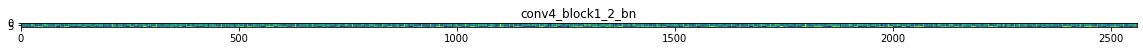

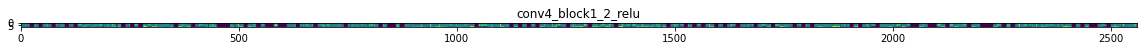

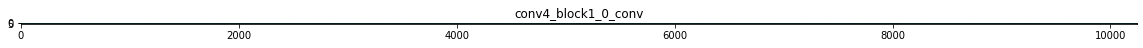

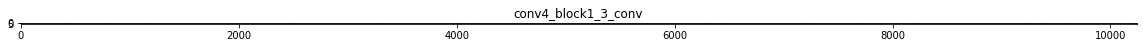

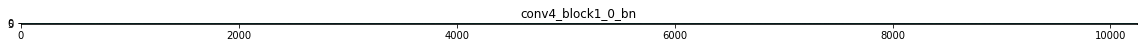

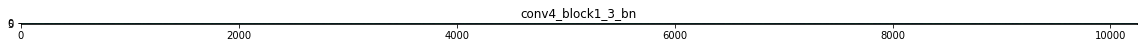

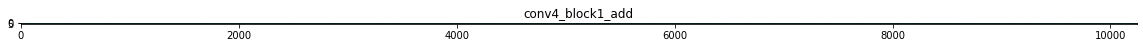

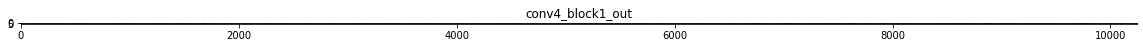

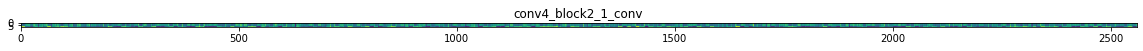

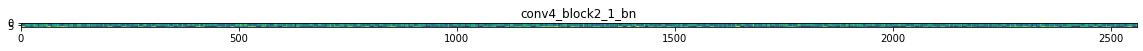

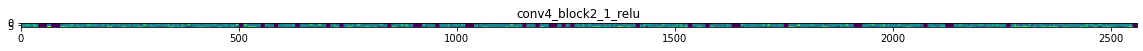

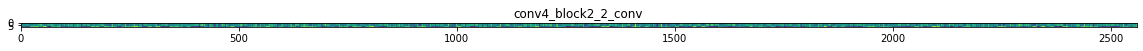

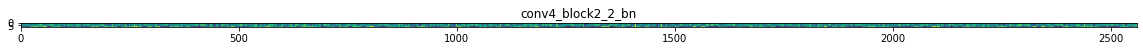

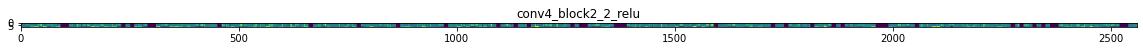

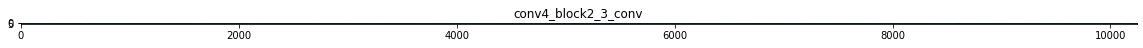

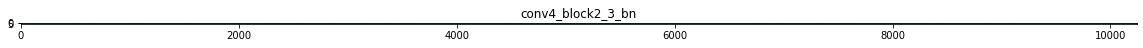

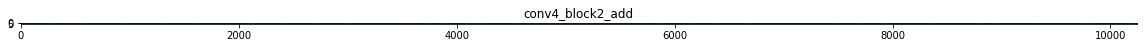

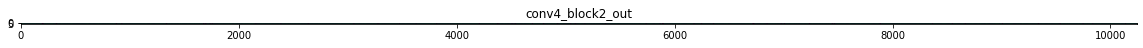

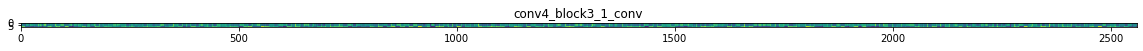

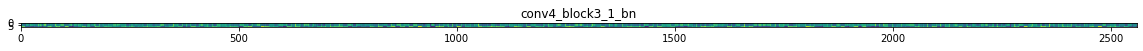

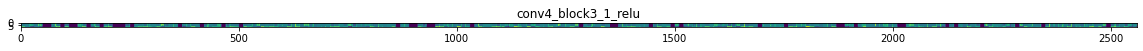

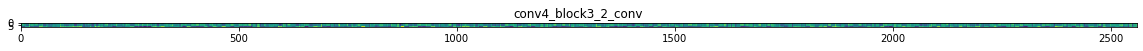

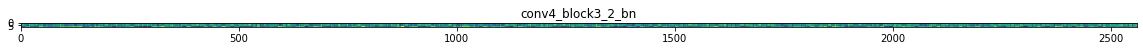

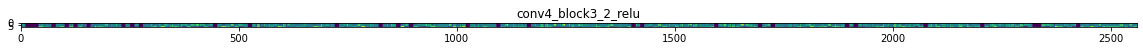

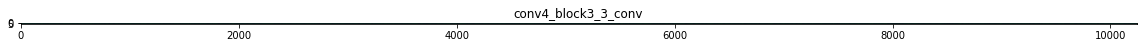

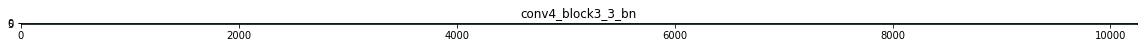

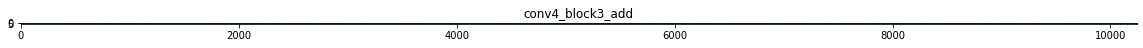

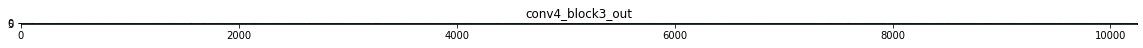

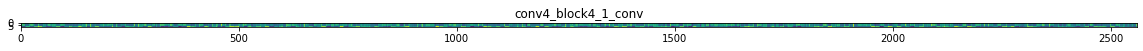

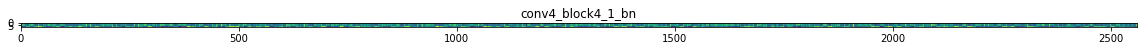

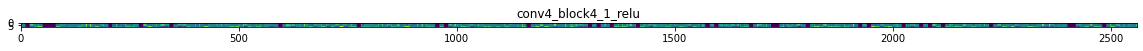

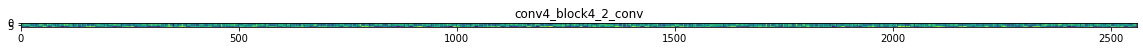

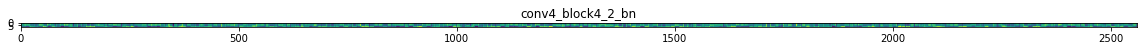

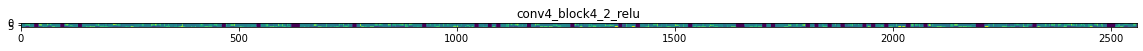

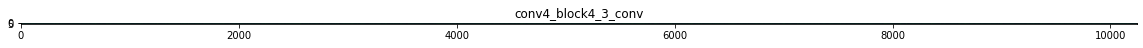

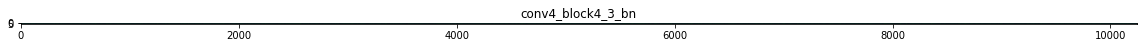

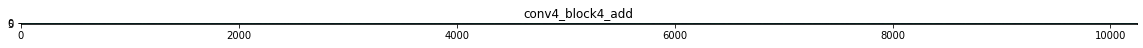

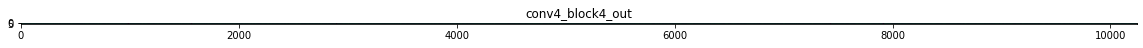

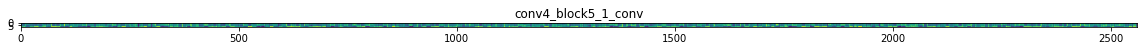

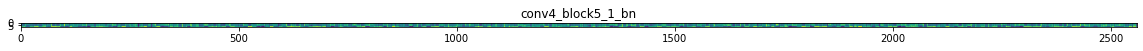

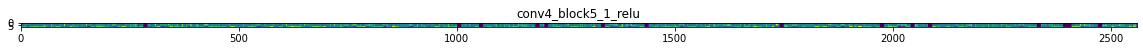

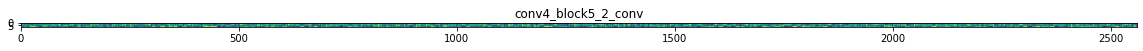

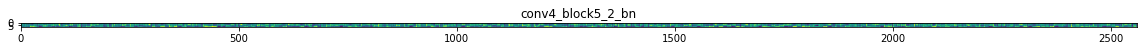

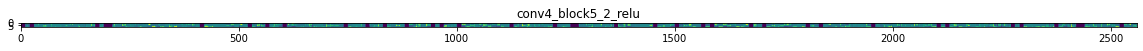

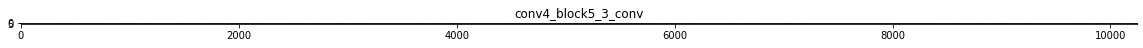

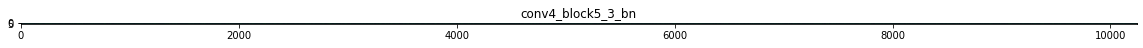

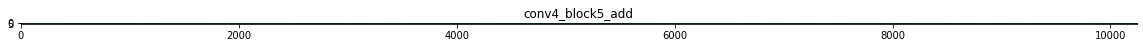

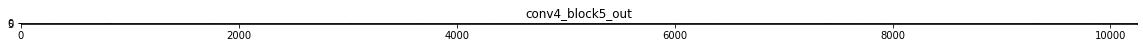

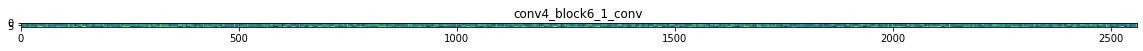

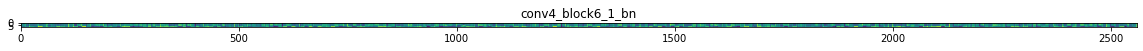

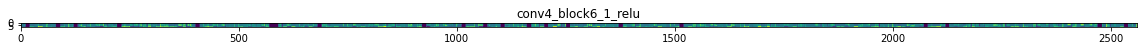

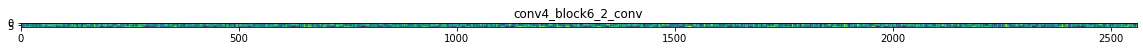

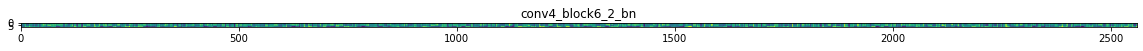

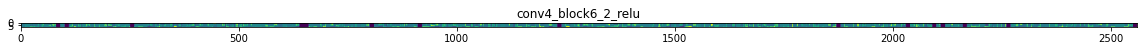

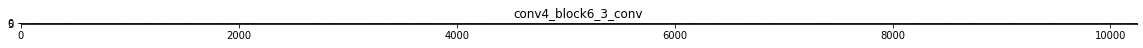

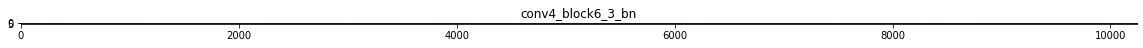

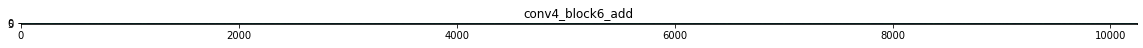

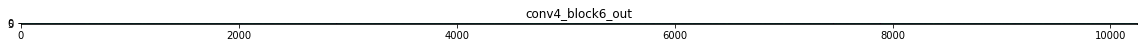

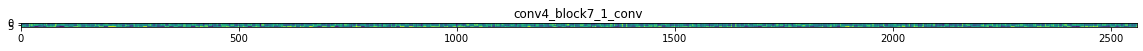

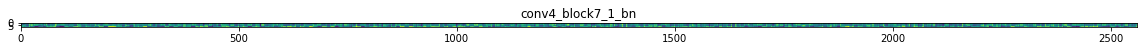

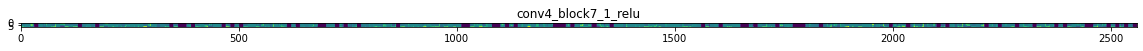

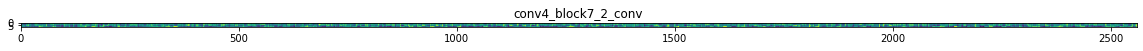

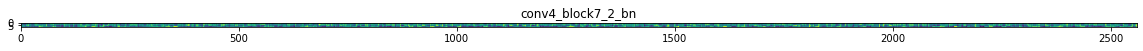

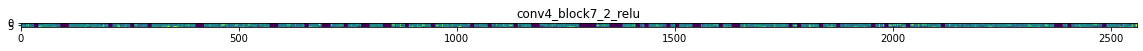

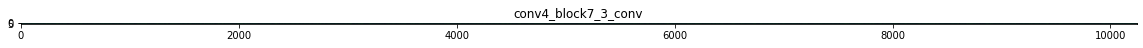

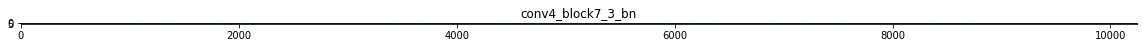

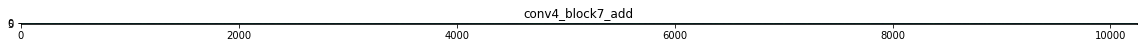

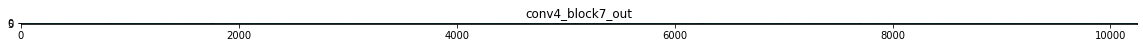

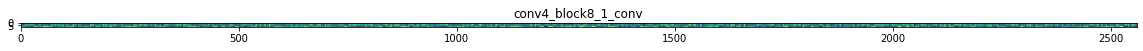

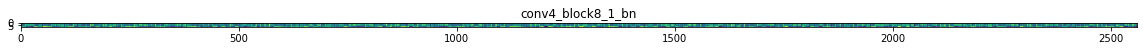

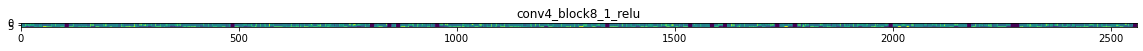

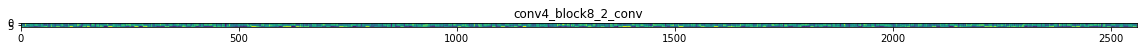

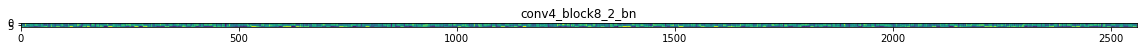

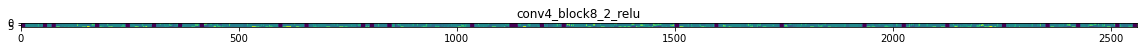

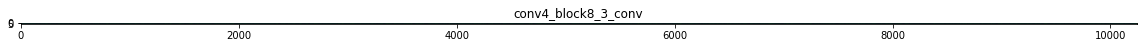

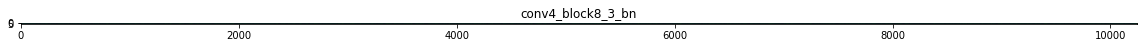

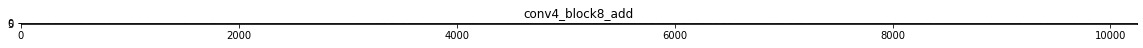

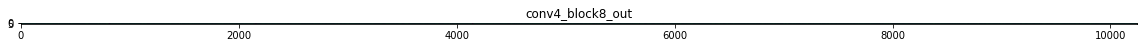

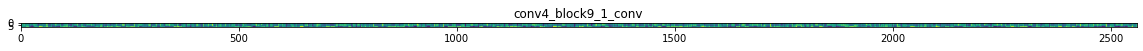

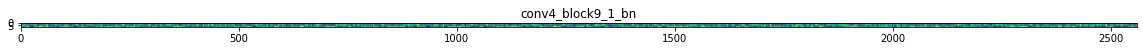

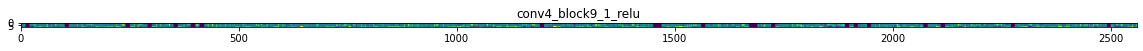

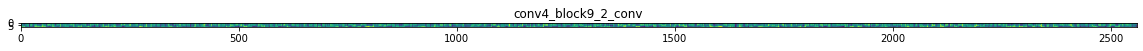

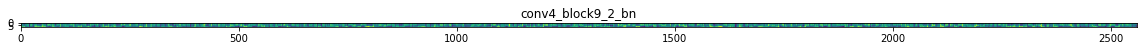

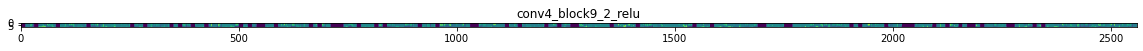

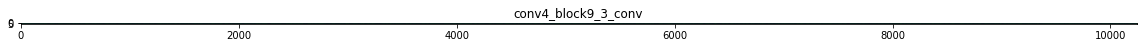

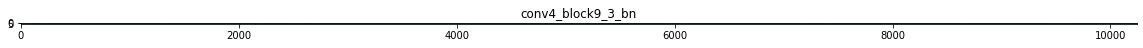

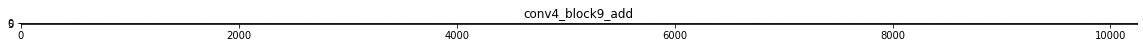

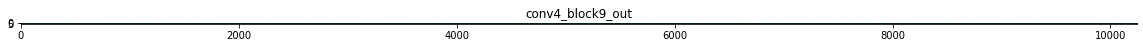

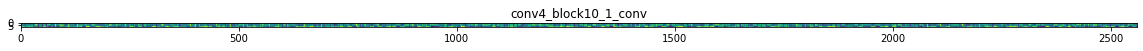

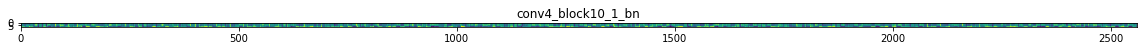

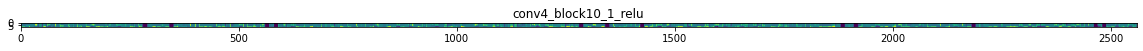

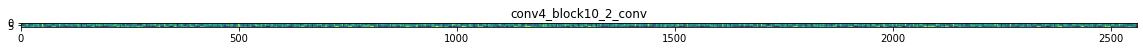

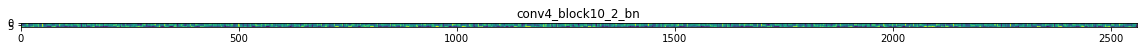

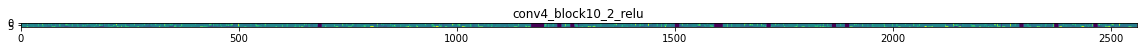

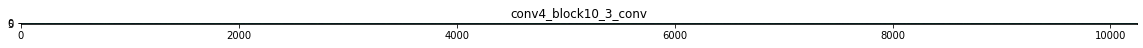

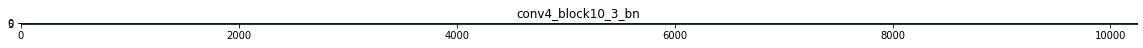

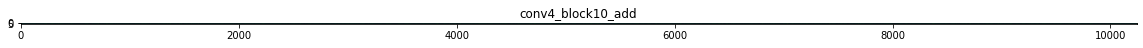

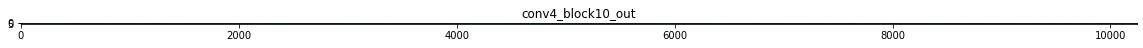

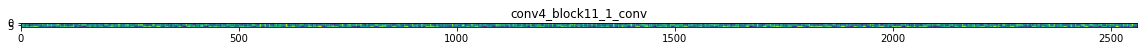

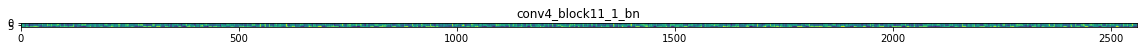

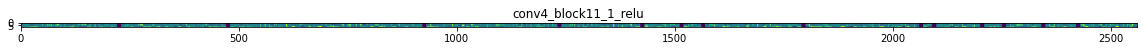

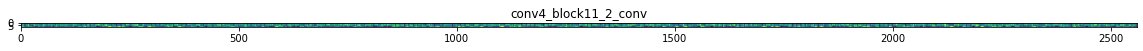

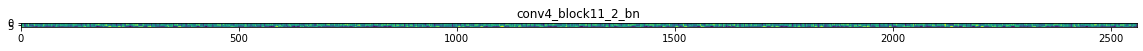

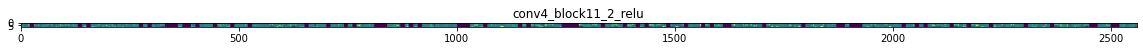

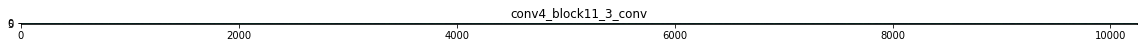

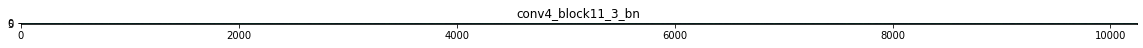

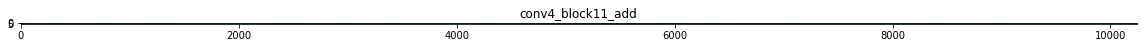

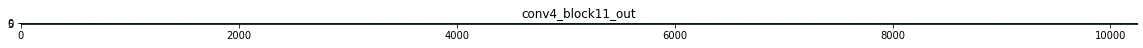

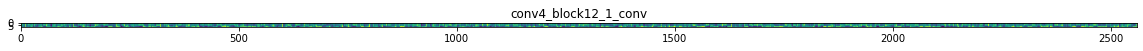

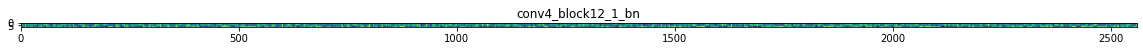

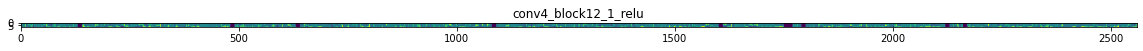

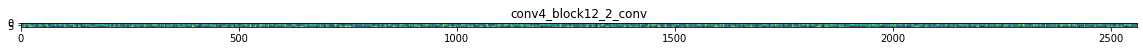

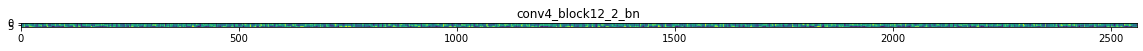

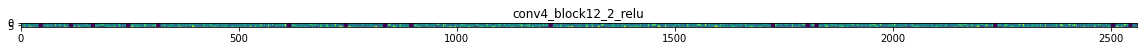

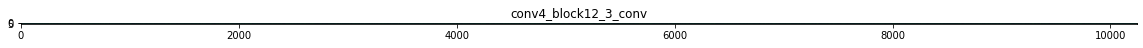

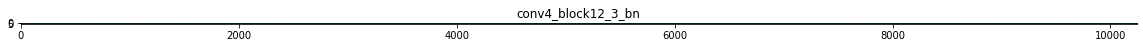

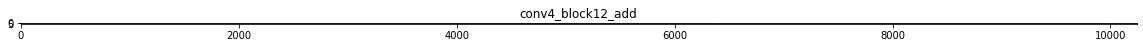

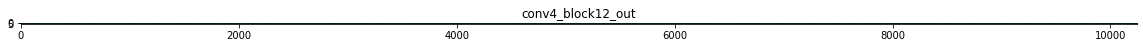

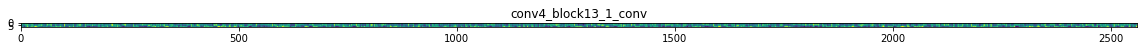

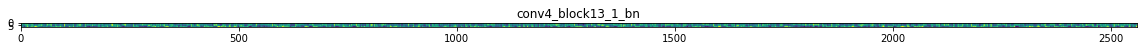

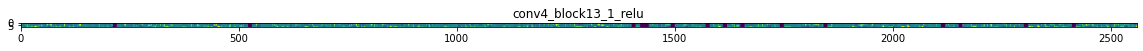

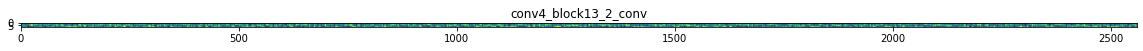

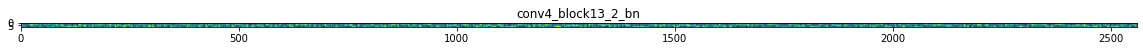

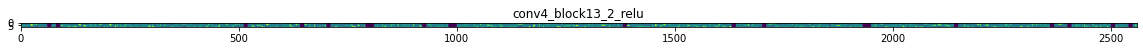

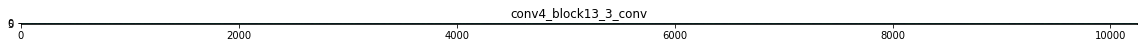

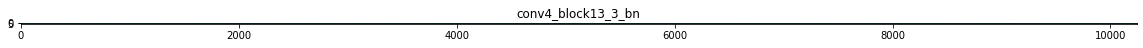

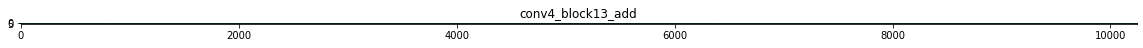

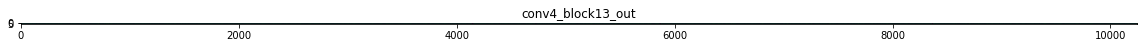

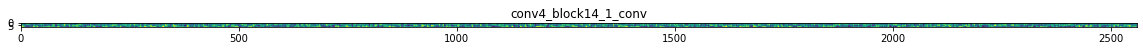

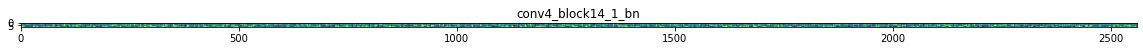

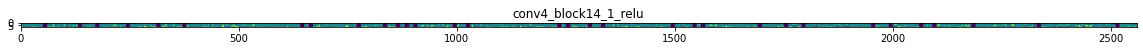

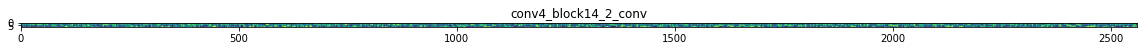

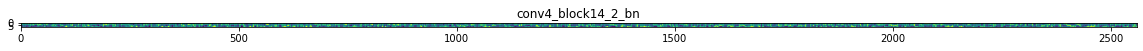

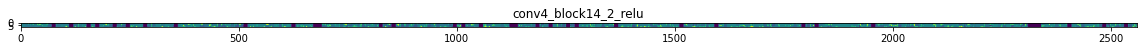

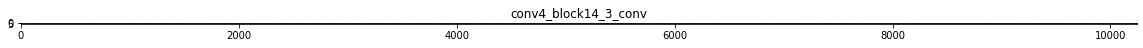

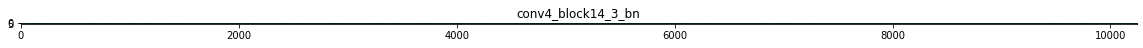

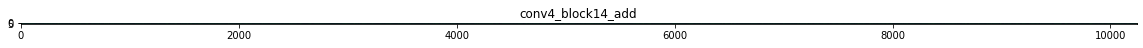

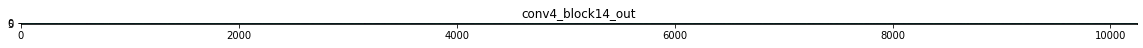

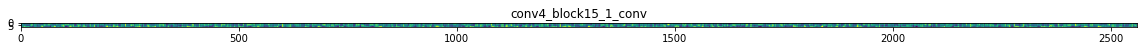

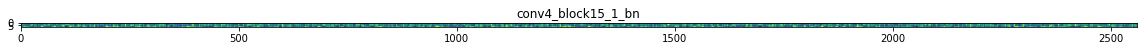

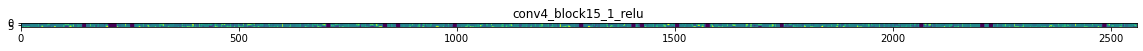

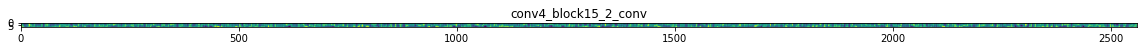

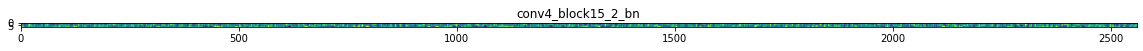

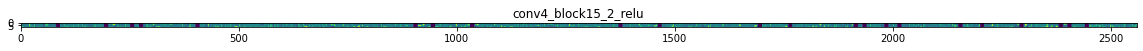

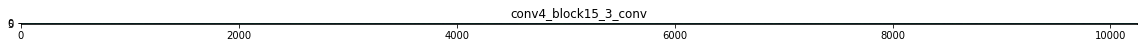

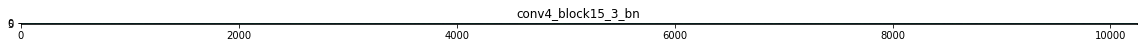

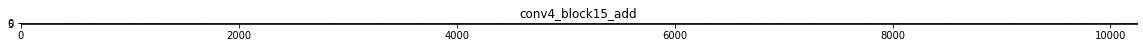

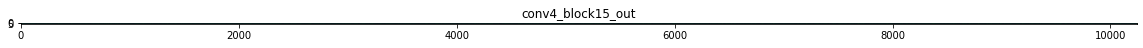

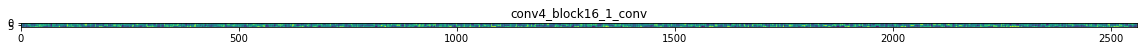

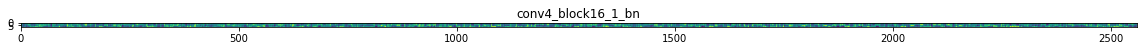

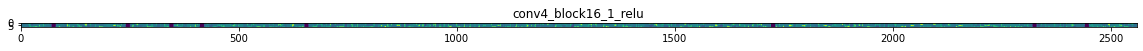

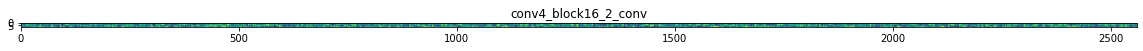

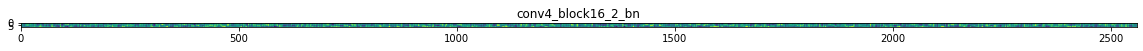

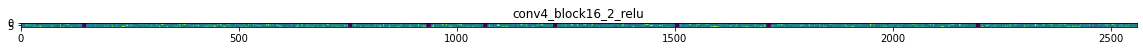

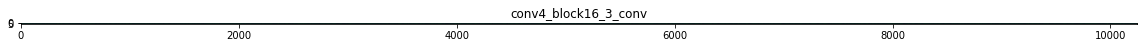

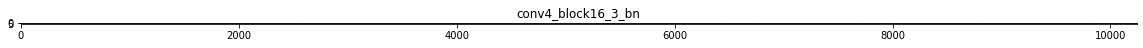

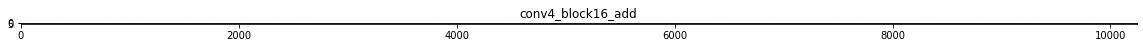

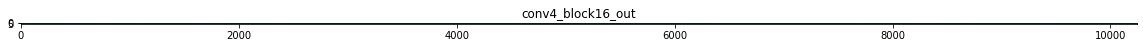

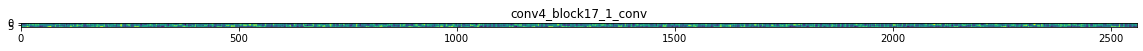

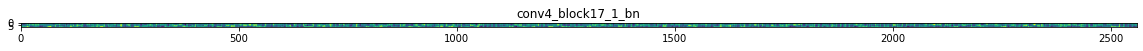

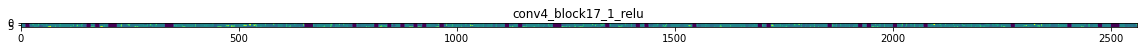

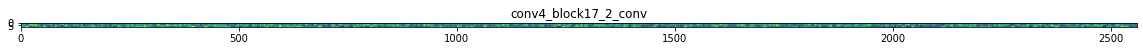

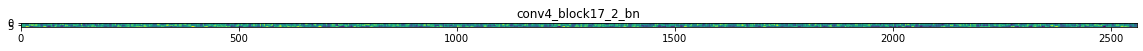

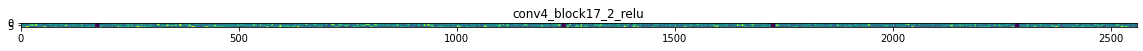

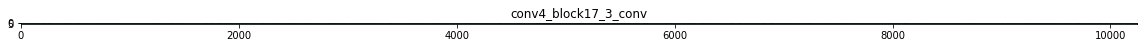

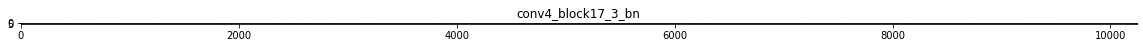

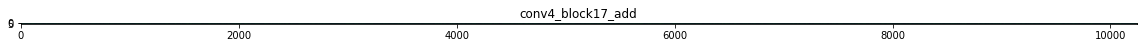

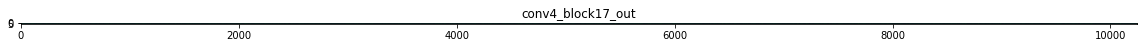

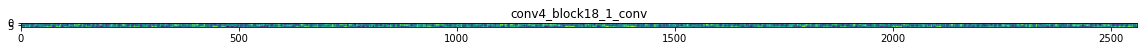

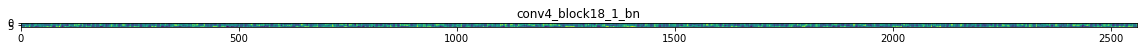

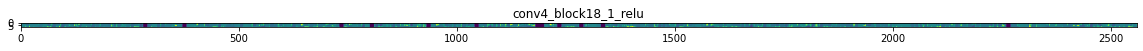

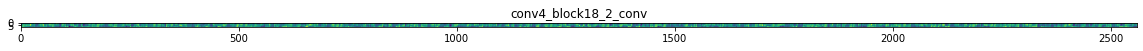

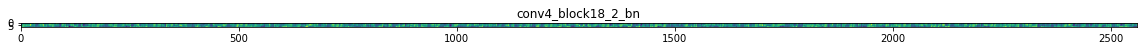

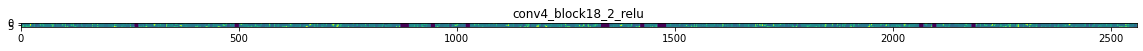

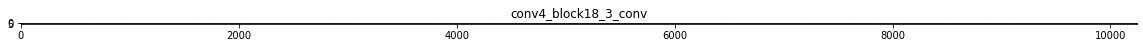

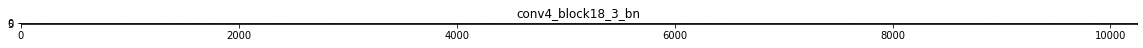

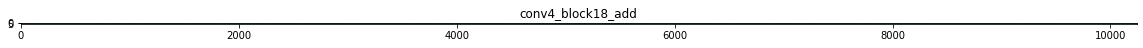

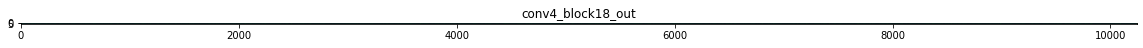

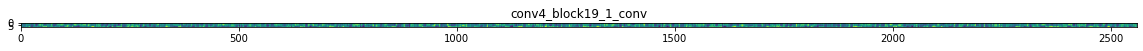

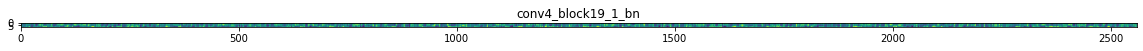

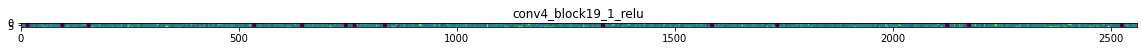

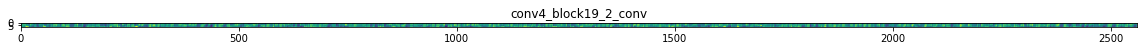

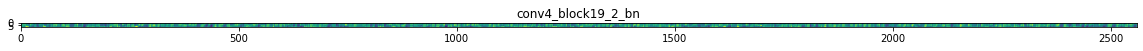

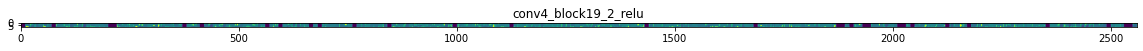

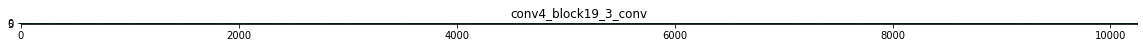

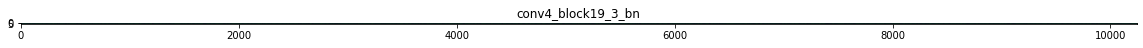

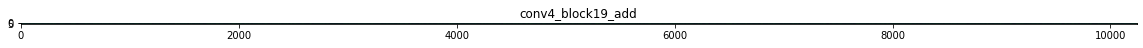

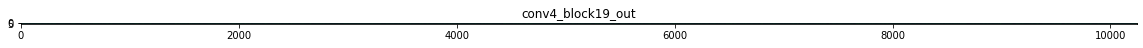

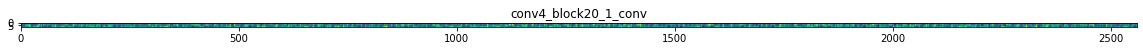

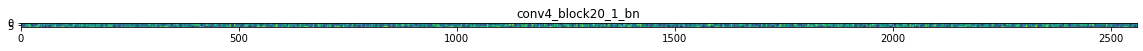

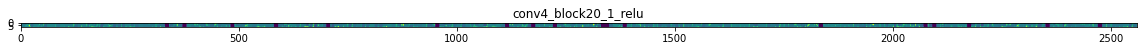

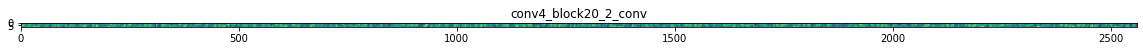

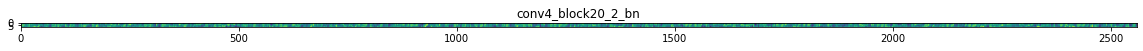

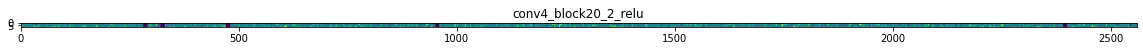

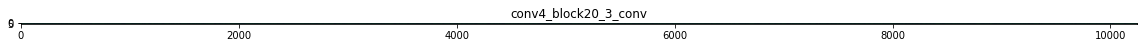

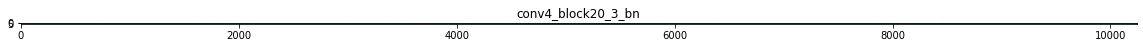

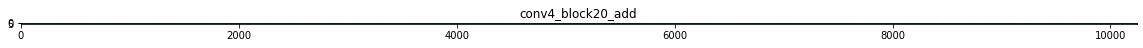

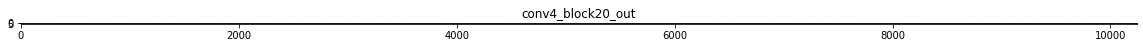

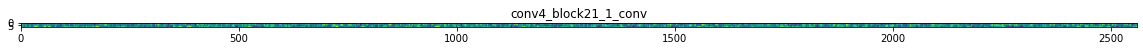

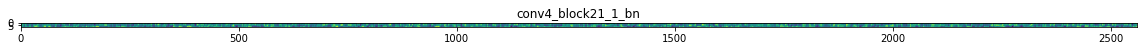

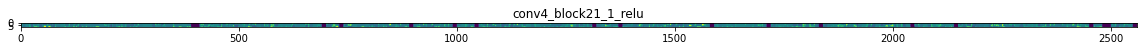

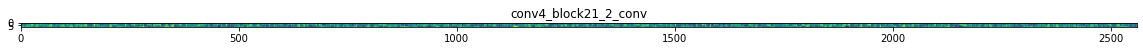

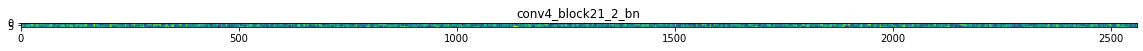

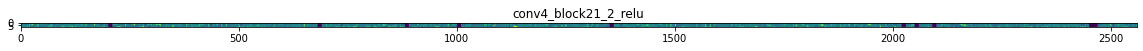

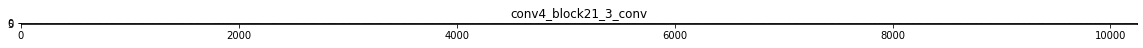

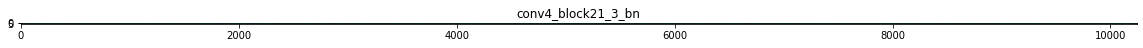

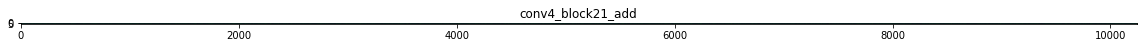

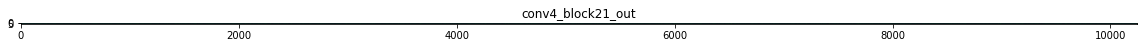

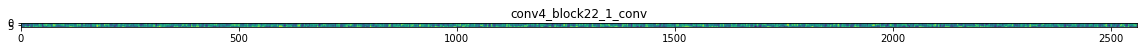

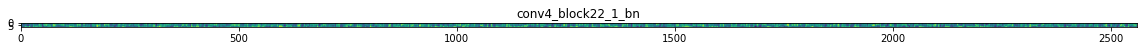

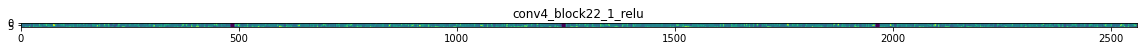

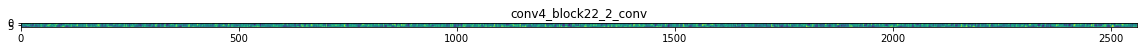

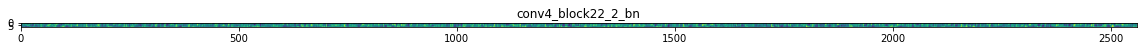

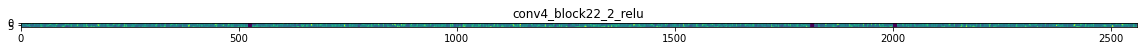

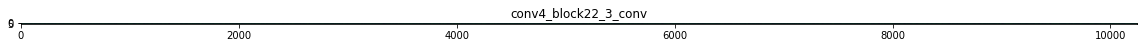

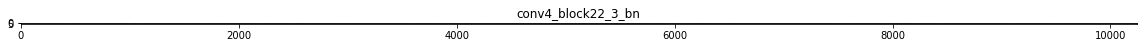

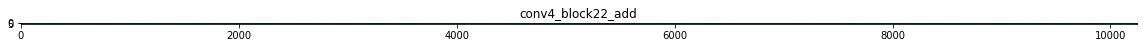

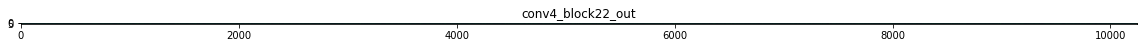

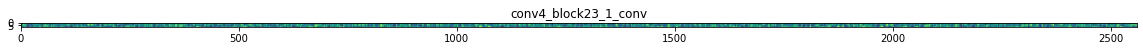

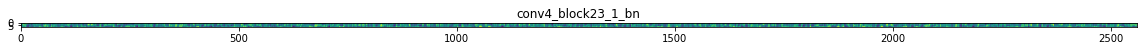

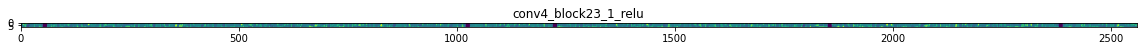

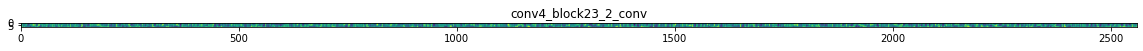

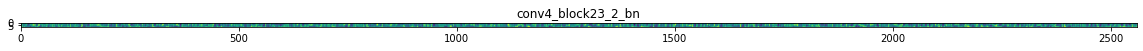

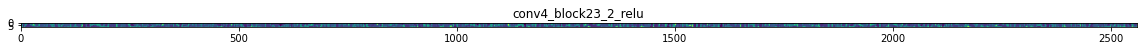

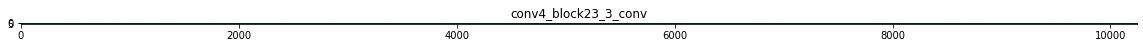

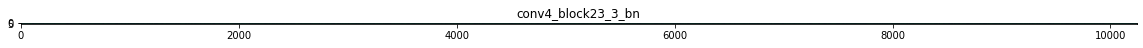

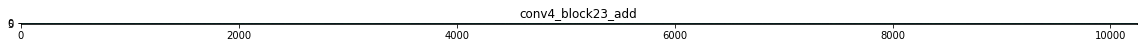

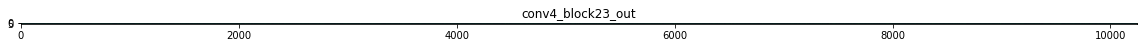

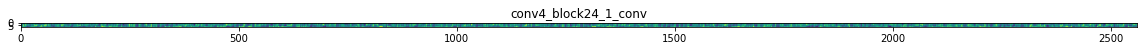

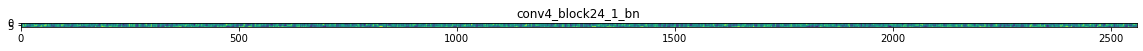

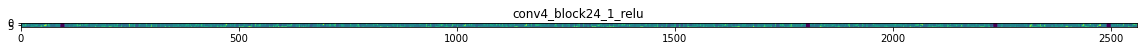

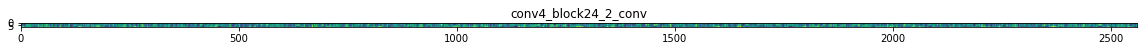

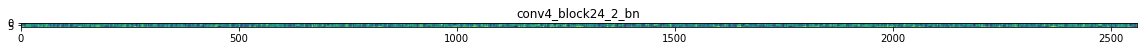

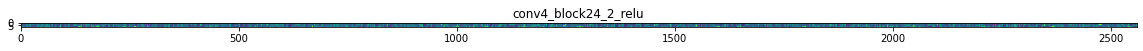

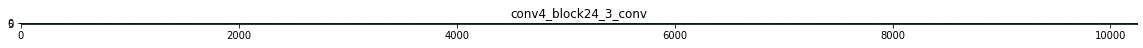

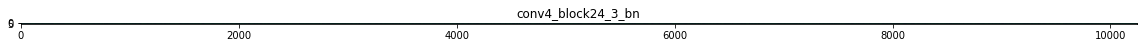

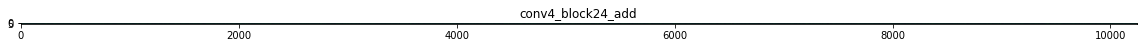

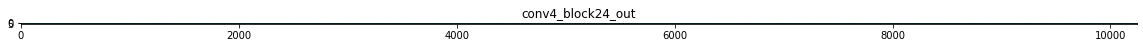

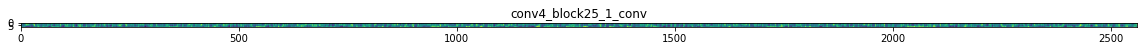

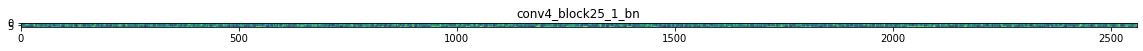

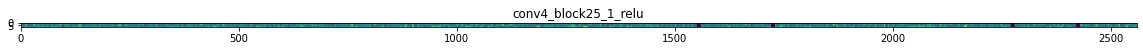

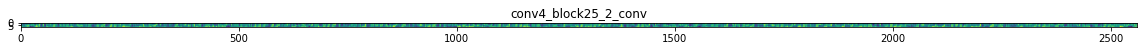

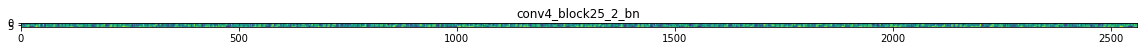

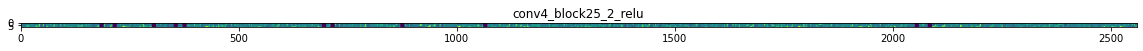

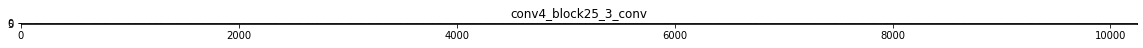

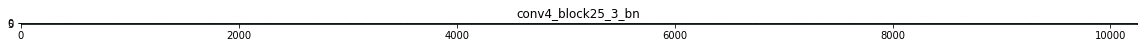

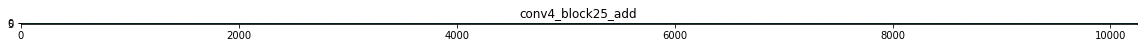

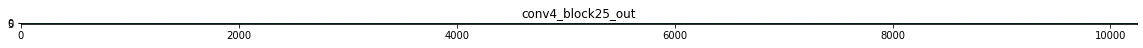

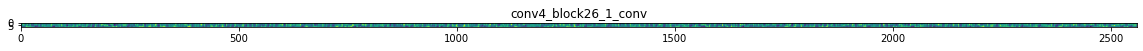

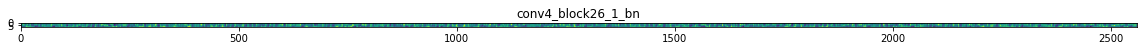

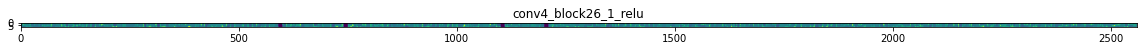

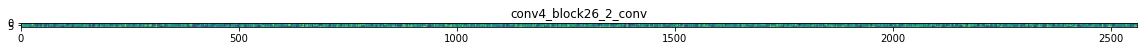

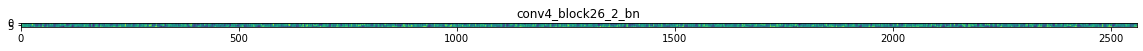

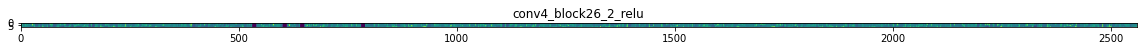

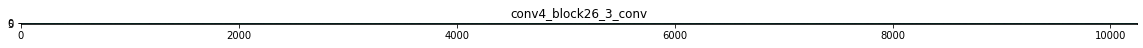

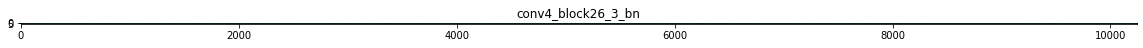

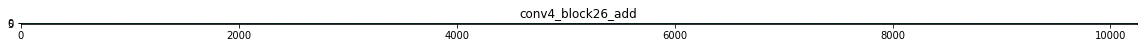

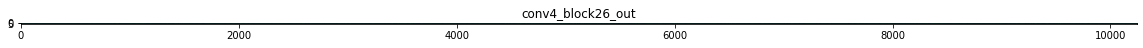

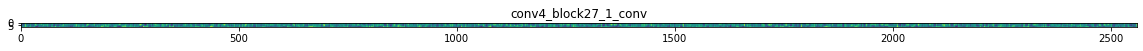

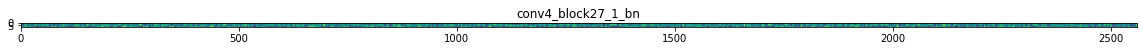

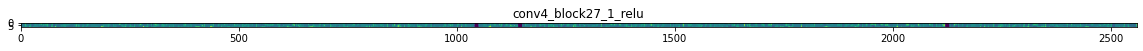

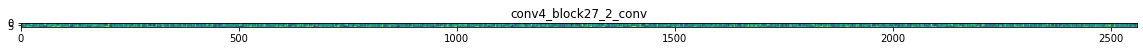

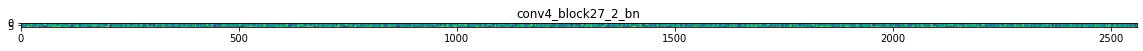

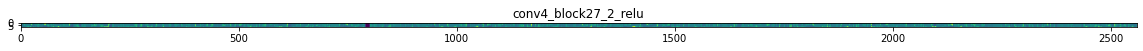

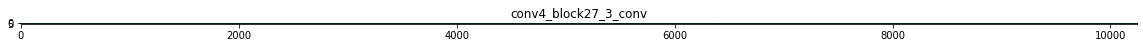

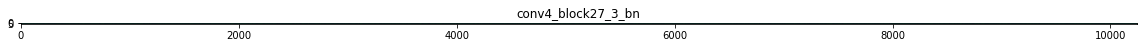

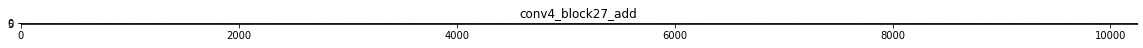

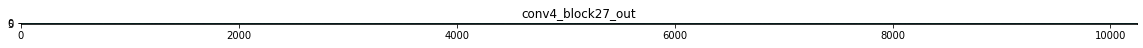

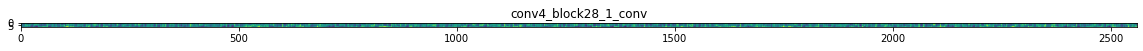

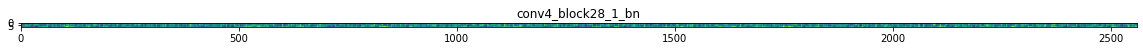

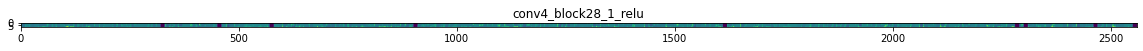

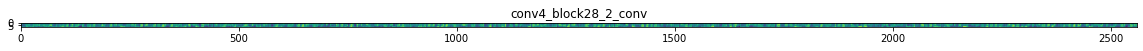

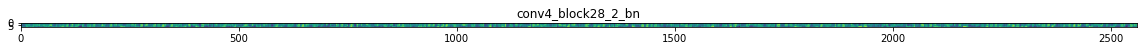

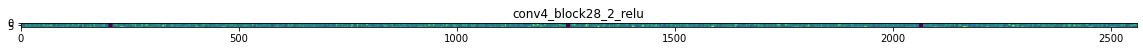

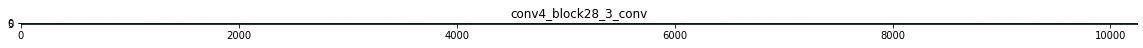

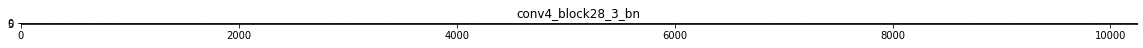

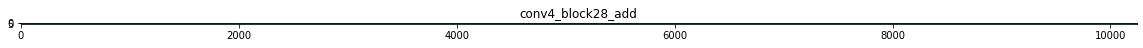

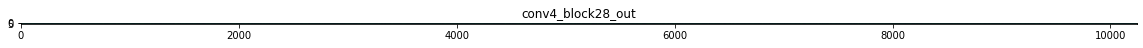

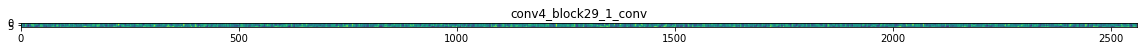

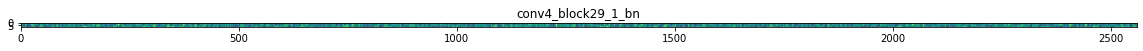

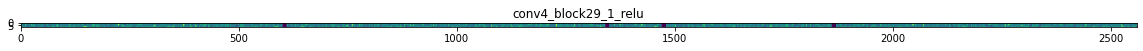

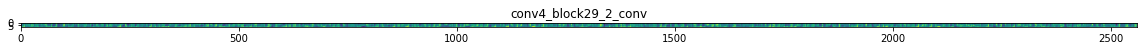

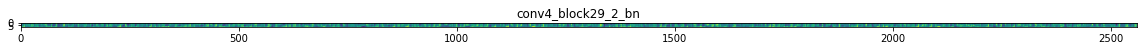

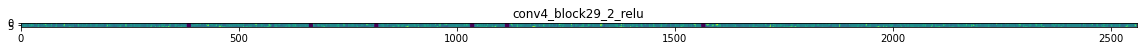

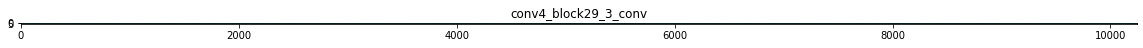

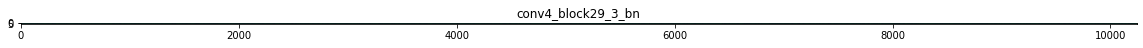

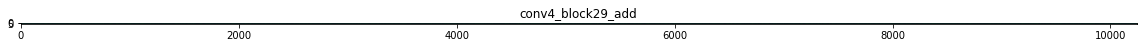

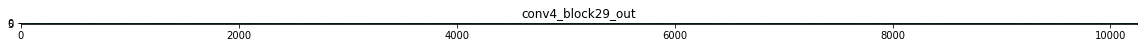

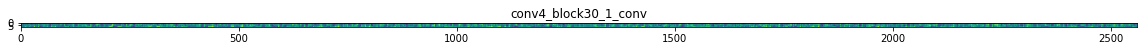

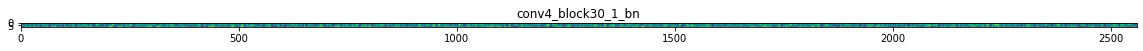

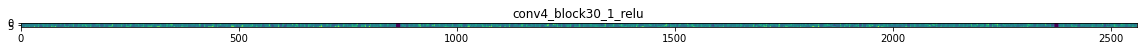

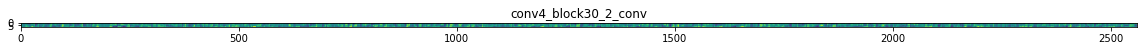

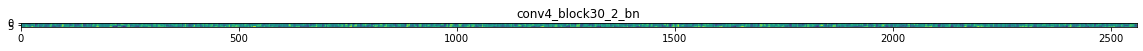

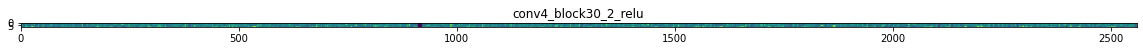

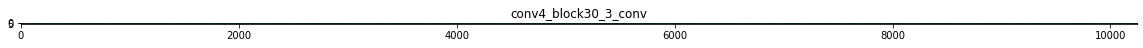

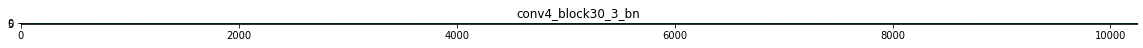

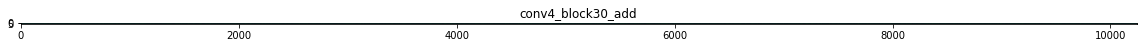

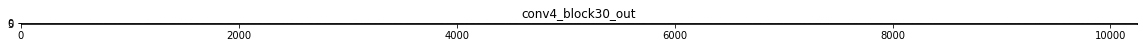

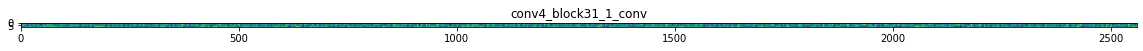

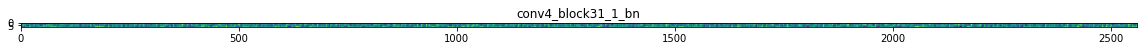

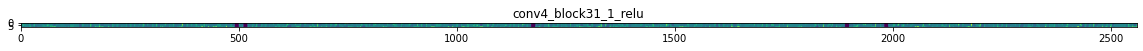

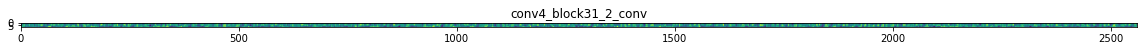

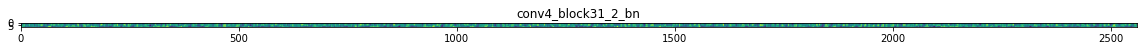

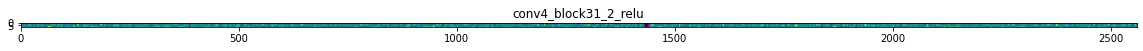

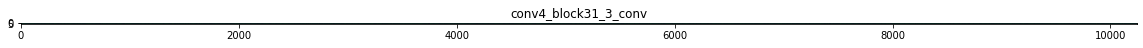

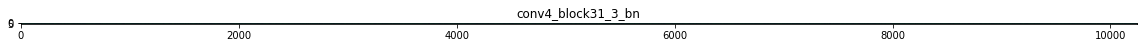

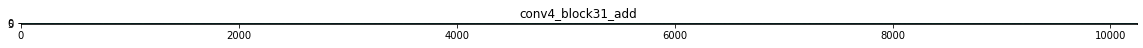

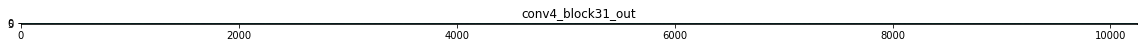

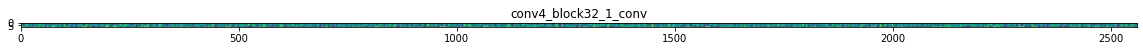

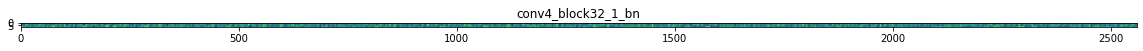

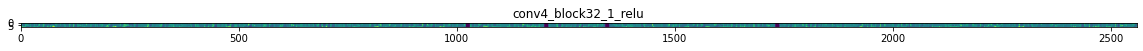

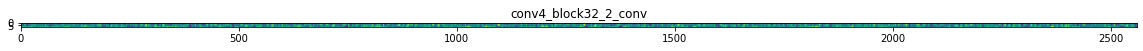

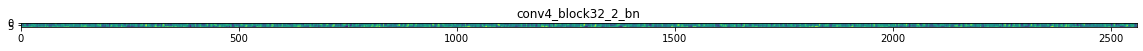

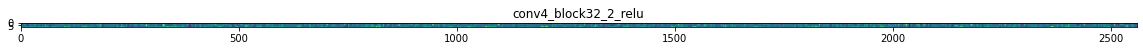

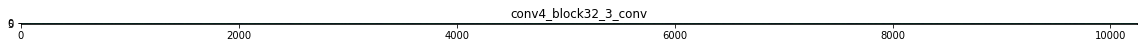

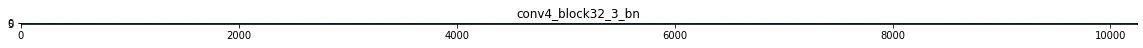

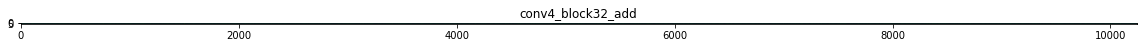

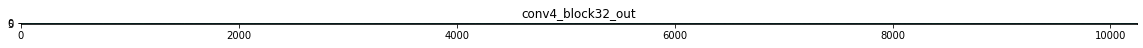

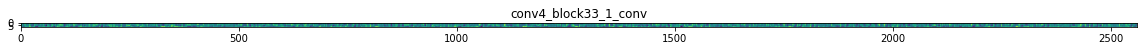

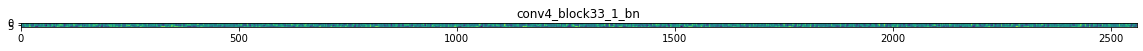

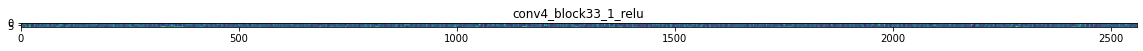

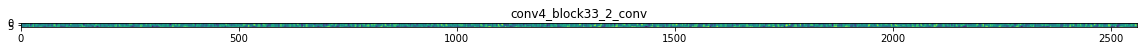

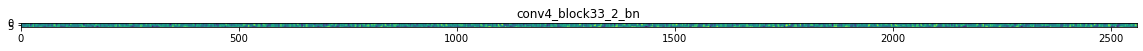

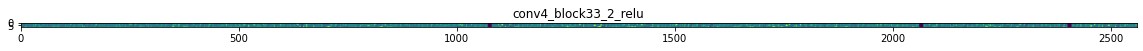

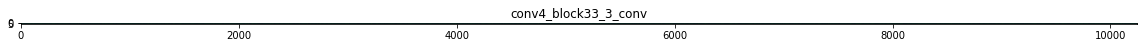

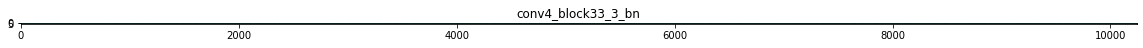

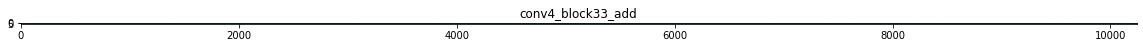

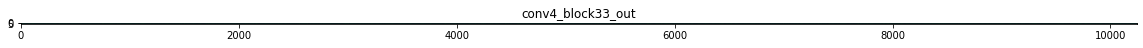

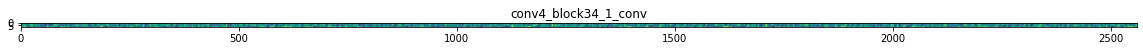

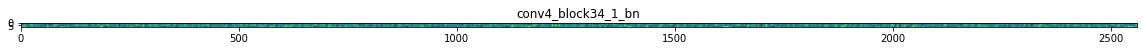

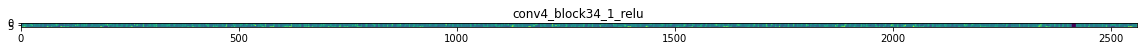

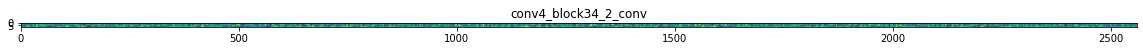

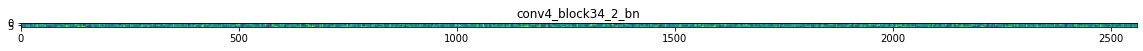

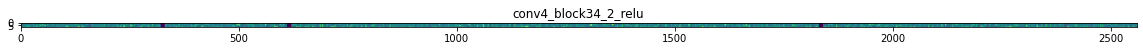

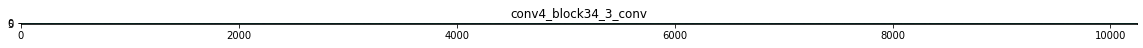

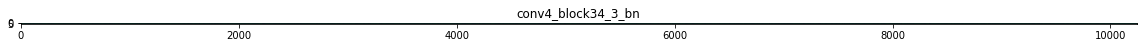

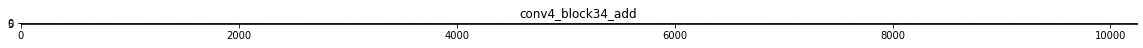

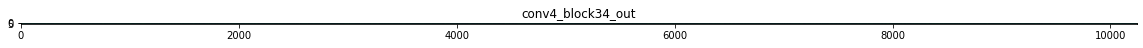

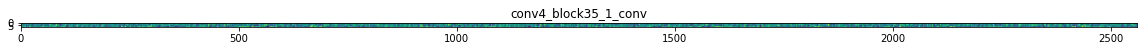

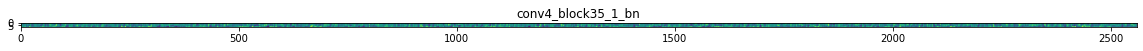

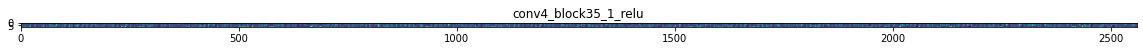

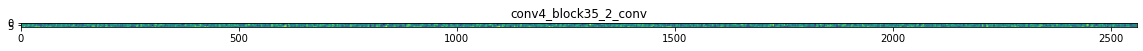

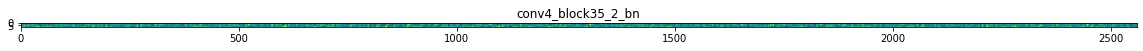

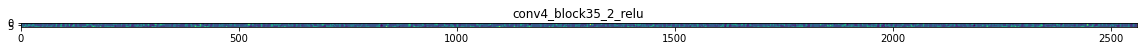

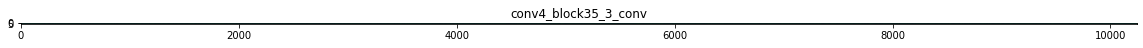

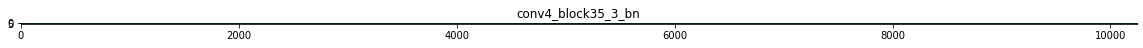

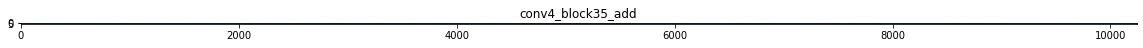

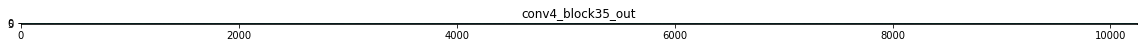

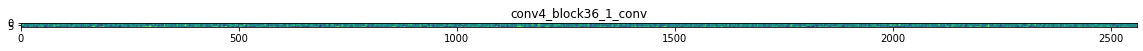

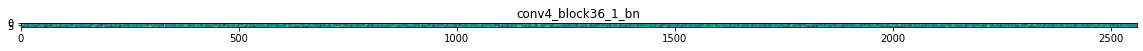

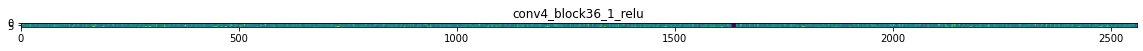

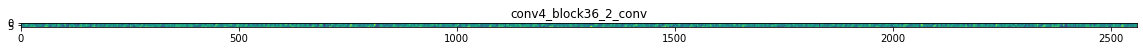

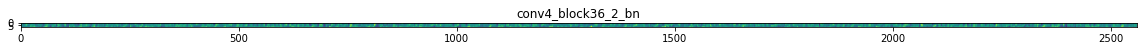

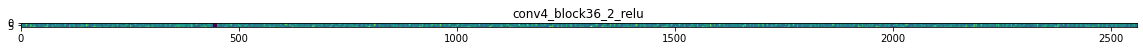

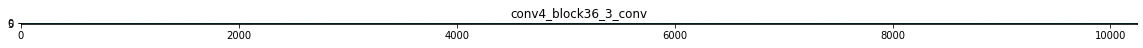

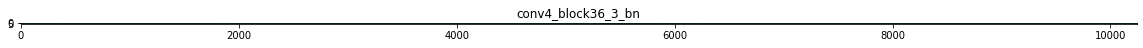

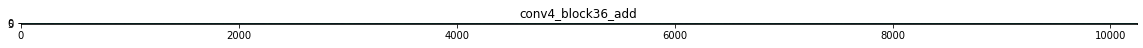

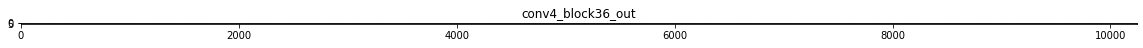

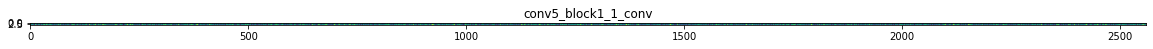

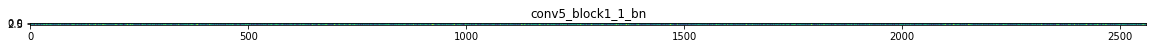

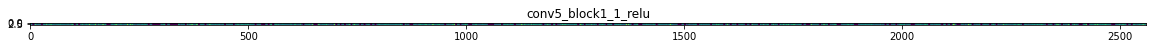

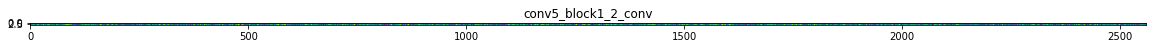

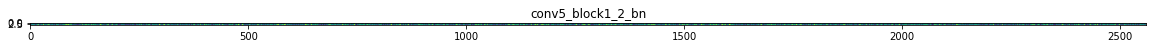

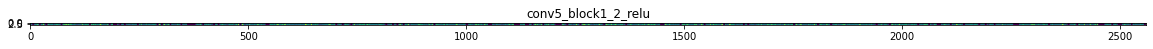

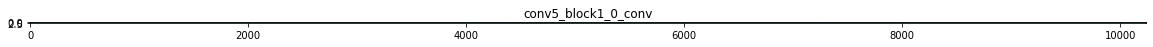

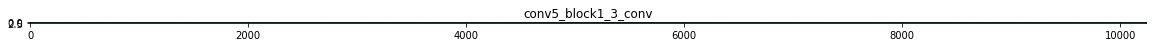

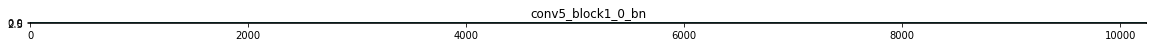

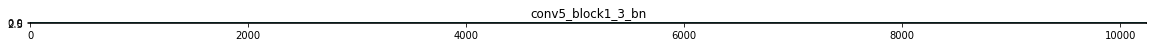

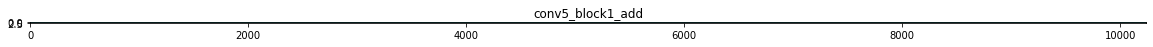

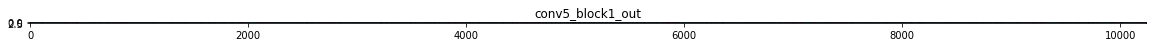

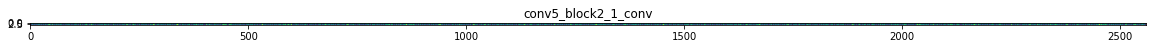

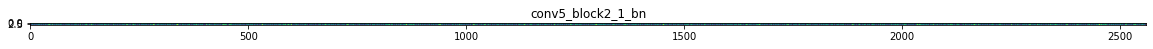

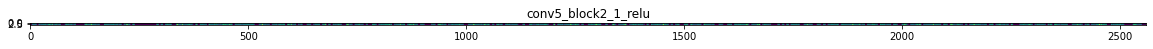

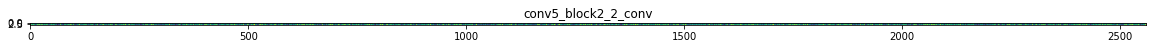

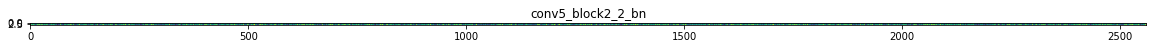

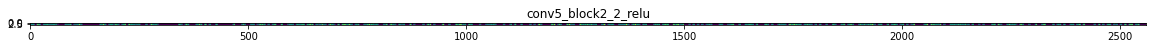

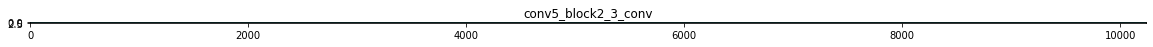

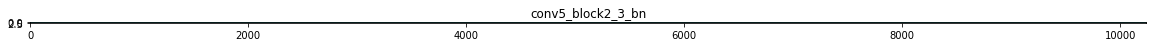

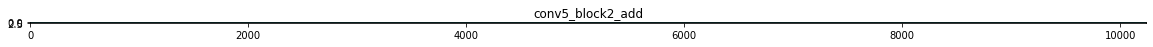

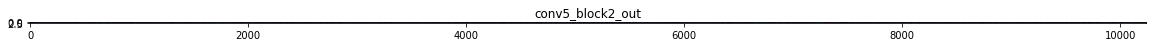

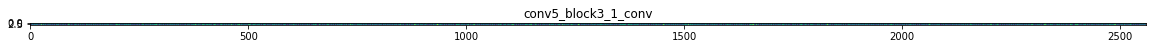

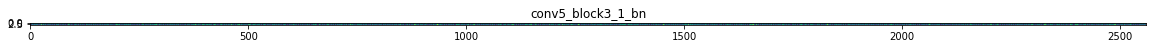

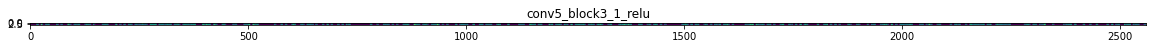

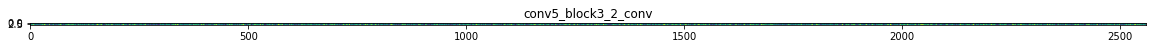

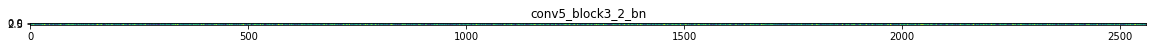

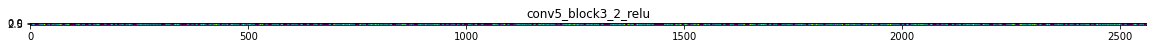

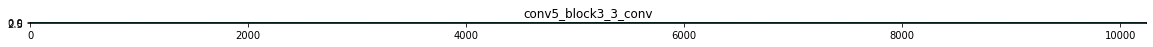

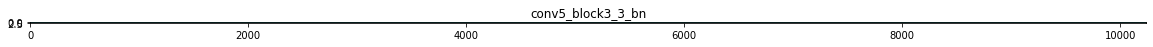

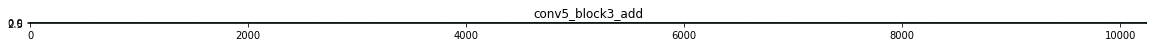

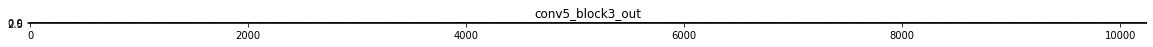

In [ ]:

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(base_model.input, successive_outputs)

img_files = []

for artist in train.values():
    img_files += [os.path.join(artist['dir'], file) for file in artist['file_names']]

img_path = random.choice(img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
x /= 255

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

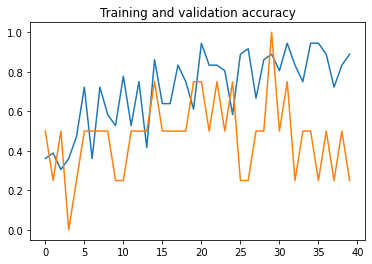

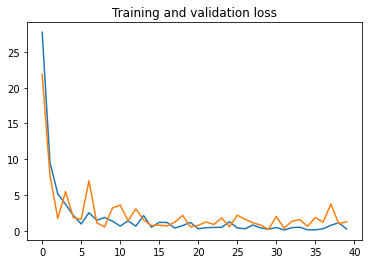

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
# with open(f'street_art_model.json', 'w') as json_file:
#     json_file.write(model.to_json())

# model.save_weights(f'street_art_weights.h5')